<a href="https://colab.research.google.com/github/ZemelakGoraga/food-and-agri/blob/main/avian_livestock_fishery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ZemelakGoraga/food-and-agri

Cloning into 'food-and-agri'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 57 (delta 25), reused 20 (delta 4), pack-reused 0
Receiving objects: 100% (57/57), 11.45 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
# Data Collection
# Loading datasets from Kaggle
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelakgoraga","key":"9bcb68625f661266080d1c6be3de4b4b"}'}

In [4]:

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 69 Sep 11 02:12 kaggle.json


In [5]:
# List the datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


 98% 433M/444M [00:07<00:00, 77.2MB/s]
100% 444M/444M [00:07<00:00, 61.6MB/s]


In [6]:
# unzip the different data files
# There are above 150 tables in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [8]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [9]:
# Viewing Data: display the first 5 rows of the df dataset

print(df.head())


   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  


In [10]:
# Display the last 5 rows of the df dataset

print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [11]:
#Understanding the Structure
# Get the number of rows and columns : the data set has 662958 rows and 11 columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 662958
Number of columns: 11


In [12]:
# Display column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')


In [13]:
# Display unique values count for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")



Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values


In [14]:
# Viewing unique values within each column

unique_areas = df['Area'].unique()

unique_items = df['Item'].unique()

unique_elements = df['Element'].unique()

unique_flags = df['Flag'].unique()

unique_years = df['Year'].unique()
unique_units = df['Unit'].unique()

print("Unique Areas:", unique_areas)

print("Unique Items:", unique_items)

print("Unique Elements:", unique_elements)

print("Unique Flags:", unique_flags)

print("Year:", unique_years)
print("Unit:", unique_units)

Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [15]:
# Select only required columns for analysis and save the data as cattle_filtered_df

selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
filtered_df = df[selected_columns]
print("Selected Data:")
print(filtered_df.head())

Selected Data:
          Area    Item          Element  Year  Unit  Value
0  Afghanistan  Cattle  Import Quantity  1961  Head    NaN
1  Afghanistan  Cattle  Import Quantity  1962  Head    NaN
2  Afghanistan  Cattle  Import Quantity  1963  Head    NaN
3  Afghanistan  Cattle  Import Quantity  1964  Head    NaN
4  Afghanistan  Cattle  Import Quantity  1965  Head    NaN


In [16]:
filtered_df.tail()

Area             Item  \
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

             Element  Year      Unit      Value  
662953  Export Value  2009  1000 US$   456293.0  
662954  Export Value  2010  1000 US$   421311.0  
662955  Export Value  2011  1000 US$   649321.0  
662956  Export Value  2012  1000 US$   778317.0  
662957  Export Value  2013  1000 US$  1038636.0

In [17]:
# Next, let us rename the 'Area' column by 'Country' and remove the 'Item' column as cattle is the only unique value in it

# Rename the 'Area' column to 'Country'
filtered_df.rename(columns={'Area': 'Country'}, inplace=True)

# Remove the 'Item' column
#filtered_df = filtered_df.drop(columns=['Item'])

# Print the updated DataFrame
print(filtered_df.head())

       Country    Item          Element  Year  Unit  Value
0  Afghanistan  Cattle  Import Quantity  1961  Head    NaN
1  Afghanistan  Cattle  Import Quantity  1962  Head    NaN
2  Afghanistan  Cattle  Import Quantity  1963  Head    NaN
3  Afghanistan  Cattle  Import Quantity  1964  Head    NaN
4  Afghanistan  Cattle  Import Quantity  1965  Head    NaN


<ipython-input-17-a42965da38f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'Area': 'Country'}, inplace=True)


In [18]:
# Select the subset where 'Unit' is '1000 US$'
# As we can see below, there are a total of 21453 rows of the dataset where the 'Unit' column is '1000 US$'

cattle_filtered_df = filtered_df[filtered_df['Unit'] == '1000 US$']

# Print the selected subset DataFrame
print(cattle_filtered_df)

                                        Country             Item  \
53                                  Afghanistan           Cattle   
54                                  Afghanistan           Cattle   
55                                  Afghanistan           Cattle   
56                                  Afghanistan           Cattle   
57                                  Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

             Element  Year      Unit      Value  
53      Import Value  1961  1000 US$        NaN  
54      Import Value  1962  1000 US$        NaN  
55      Import Value  1963  1000 

In [19]:
# Select the subset where 'Unit' is '1000 Head'
# As we can see below, there is no row of the dataset where the 'Unit' column is '1000 Head', so there is no need to multiply the quantity by 1000 head
subset_filtered_df = filtered_df[filtered_df['Unit'] == '1000 Head']

# Print the selected subset DataFrame
print(subset_filtered_df)

                                        Country      Item          Element  \
106                                 Afghanistan  Chickens  Import Quantity   
107                                 Afghanistan  Chickens  Import Quantity   
108                                 Afghanistan  Chickens  Import Quantity   
109                                 Afghanistan  Chickens  Import Quantity   
110                                 Afghanistan  Chickens  Import Quantity   
...                                         ...       ...              ...   
662052  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662053  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662054  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662055  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662056  Net Food Importing Developing Countries   Turkeys  Export Quantity   

        Year       Unit   Value  
106     1961  1000 Head     0

In [20]:
# Let us multiply the 'Value' column for the import and export values by '1000 US$' as follows:

# Create a boolean mask for rows where 'Unit' is '1000 US$'
mask = filtered_df['Unit'] == '1000 US$'

# Multiply 'Value' column by 1000 for the selected rows
filtered_df.loc[mask, 'Value'] = filtered_df.loc[mask, 'Value'] * 1000

# Print the updated DataFrame
print(filtered_df)

                                        Country             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year      Unit         Value  
0       Import Quantity  1961      Head           NaN  
1       Import Quantity  1962      Head           NaN  
2       Import 

In [21]:
# Let us multiply the 'Value' column for the import and export Quantities by '1000 head' as follows:

# Create a boolean mask for rows where 'Unit' is '1000 head'
mask = filtered_df['Unit'] == '1000 head'

# Multiply 'Value' column by 1000 for the selected rows
filtered_df.loc[mask, 'Value'] = filtered_df.loc[mask, 'Value'] * 1000

# Print the updated DataFrame
print(filtered_df)

                                        Country             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year      Unit         Value  
0       Import Quantity  1961      Head           NaN  
1       Import Quantity  1962      Head           NaN  
2       Import 

In [22]:
filtered_df.tail()

Country             Item  \
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

             Element  Year      Unit         Value  
662953  Export Value  2009  1000 US$  4.562930e+08  
662954  Export Value  2010  1000 US$  4.213110e+08  
662955  Export Value  2011  1000 US$  6.493210e+08  
662956  Export Value  2012  1000 US$  7.783170e+08  
662957  Export Value  2013  1000 US$  1.038636e+09

In [23]:
# prompt: remove 'Unit' column from the filtered_df dataset

filtered_df = filtered_df.drop(columns=['Unit'])
filtered_df.head()

Country    Item          Element  Year  Value
0  Afghanistan  Cattle  Import Quantity  1961    NaN
1  Afghanistan  Cattle  Import Quantity  1962    NaN
2  Afghanistan  Cattle  Import Quantity  1963    NaN
3  Afghanistan  Cattle  Import Quantity  1964    NaN
4  Afghanistan  Cattle  Import Quantity  1965    NaN

In [24]:
filtered_df.shape

(662958, 5)

In [25]:
# Let us keep the 'cattle_filtered_df'dataset as it is and make its copy as df1 for further data processing

df2 = filtered_df.copy()
df2.head()


Country    Item          Element  Year  Value
0  Afghanistan  Cattle  Import Quantity  1961    NaN
1  Afghanistan  Cattle  Import Quantity  1962    NaN
2  Afghanistan  Cattle  Import Quantity  1963    NaN
3  Afghanistan  Cattle  Import Quantity  1964    NaN
4  Afghanistan  Cattle  Import Quantity  1965    NaN

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662958 entries, 0 to 662957
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  662958 non-null  object 
 1   Item     662958 non-null  object 
 2   Element  662958 non-null  object 
 3   Year     662958 non-null  int64  
 4   Value    527768 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.3+ MB


In [27]:
# prompt: convert 'Year' to an object data type

df2['Year'] = df2['Year'].astype(object)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662958 entries, 0 to 662957
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  662958 non-null  object 
 1   Item     662958 non-null  object 
 2   Element  662958 non-null  object 
 3   Year     662958 non-null  object 
 4   Value    527768 non-null  float64
dtypes: float64(1), object(4)
memory usage: 25.3+ MB


In [29]:
df2.describe()

Value
count  5.277680e+05
mean   5.047641e+09
std    1.306108e+11
min    0.000000e+00
25%    0.000000e+00
50%    8.299500e+03
75%    2.705000e+06
max    1.881876e+13

In [30]:
# sort the dataset df2 by 'Item'

df2.sort_values('Item')


Country                     Item          Element  Year        Value
220600      India  Agricult.Products,Total     Import Value  1961  632864000.0
147010   Dominica  Agricult.Products,Total     Import Value  2004   30559000.0
147011   Dominica  Agricult.Products,Total     Import Value  2005   30822000.0
147012   Dominica  Agricult.Products,Total     Import Value  2006   33458000.0
147013   Dominica  Agricult.Products,Total     Import Value  2007   39643000.0
...           ...                      ...              ...   ...          ...
558344   Americas                  Turkeys  Import Quantity  1990      12947.0
558343   Americas                  Turkeys  Import Quantity  1989      11465.0
558342   Americas                  Turkeys  Import Quantity  1988       4142.0
558348   Americas                  Turkeys  Import Quantity  1994       8124.0
330941  Nicaragua                  Turkeys  Import Quantity  1962          NaN

[662958 rows x 5 columns]

In [31]:
# unique values in the Item column

df2['Item'].unique()

array(['Cattle', 'Chickens', 'Horses', 'Total Merchandise Trade',
       'Agricult.Products,Total', 'Bovine, Animals', 'Food Excl Fish',
       'Live Animals', 'Pigeons, other birds', 'Animals live nes',
       'Animals, live, non-food', 'Asses', 'Beehives', 'Buffaloes',
       'Ducks', 'Goats', 'Mules', 'Pigs', 'Sheep', 'Turkeys',
       'Sheep and Goats', 'Camels', 'Rabbits and hares',
       'Camelids, other', 'Rodents, other'], dtype=object)

In [32]:
# prompt: using the df2 dataset, calculate the min and max of the 'Value' column for unique values in the 'Item' column

df2.groupby(['Item'])['Value'].agg(['min', 'max'])

min           max
Item                                      
Agricult.Products,Total  0.0  1.429348e+12
Animals live nes         0.0  1.442400e+08
Animals, live, non-food  0.0  8.979510e+08
Asses                    0.0  1.401000e+07
Beehives                 0.0  6.254200e+07
Bovine, Animals          0.0  9.679163e+09
Buffaloes                0.0  1.152130e+08
Camelids, other          0.0  1.031000e+06
Camels                   0.0  2.204270e+08
Cattle                   0.0  9.563950e+09
Chickens                 0.0  2.526618e+09
Ducks                    0.0  1.056760e+08
Food Excl Fish           0.0  1.024016e+12
Goats                    0.0  3.800400e+08
Horses                   0.0  2.573888e+09
Live Animals             0.0  2.189765e+10
Mules                    0.0  2.476700e+07
Pigeons, other birds     0.0  3.679200e+07
Pigs                     0.0  5.029732e+09
Rabbits and hares        0.0  4.397700e+07
Rodents, other           0.0  1.060000e+05
Sheep                    0.0  1.681812e+09
Sheep and Goats          0.0  2.012080e+09
Total Merchandise Trade  0.0  1.881876e+13
Turkeys                  0.0  3.892500e+08

In [33]:
df2.shape

(662958, 5)

In [34]:
# prompt: using the df2 dataset, remove rows where 'Value' = 0.0

df2 = df2[df2['Value'] != 0.0]


In [35]:
df2.shape

(495902, 5)

In [36]:
# Check for missing values in each column
missing_values = df2.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Country         0
Item            0
Element         0
Year            0
Value      135190
dtype: int64


In [37]:
# Let us sort missing values by unique values in the 'Item' column

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df2['Item'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_items)

# Iterate through unique items and calculate missing value counts
for item in unique_items:
    subset = df2[df2['Item'] == item]
    missing_counts = subset.isnull().sum()
    missing_values_df2[item] = missing_counts

# Print the DataFrame with missing value counts
print(missing_values_df2)

         Agricult.Products,Total  Animals live nes  Animals, live, non-food  \
Country                        0                 0                        0   
Item                           0                 0                        0   
Element                        0                 0                        0   
Year                           0                 0                        0   
Value                          4              9393                     4952   

         Asses  Beehives  Bovine, Animals  Buffaloes  Camelids, other  Camels  \
Country      0         0                0          0                0       0   
Item         0         0                0          0                0       0   
Element      0         0                0          0                0       0   
Year         0         0                0          0                0       0   
Value     5460     11667             2717       6978             3899    5545   

         Cattle  ...  Live Animals  Mu

In [38]:
# prompt: Using the df2 dataset, calculate the Median .Sort the DataFrame by the 'Item' column

df2.groupby(['Item'])['Value'].agg(['median'])

median
Item                                 
Agricult.Products,Total  2.919790e+08
Animals live nes         1.070000e+05
Animals, live, non-food  9.540000e+05
Asses                    3.575000e+03
Beehives                 1.600000e+04
Bovine, Animals          1.850000e+05
Buffaloes                3.900000e+04
Camelids, other          9.185000e+02
Camels                   6.696000e+04
Cattle                   1.814990e+05
Chickens                 2.500000e+04
Ducks                    3.950000e+03
Food Excl Fish           1.916230e+08
Goats                    3.400000e+04
Horses                   1.378600e+04
Live Animals             5.346000e+06
Mules                    1.736000e+03
Pigeons, other birds     3.000000e+03
Pigs                     5.700000e+04
Rabbits and hares        4.000000e+03
Rodents, other           5.230000e+02
Sheep                    1.690000e+05
Sheep and Goats          1.730000e+05
Total Merchandise Trade  1.711110e+09
Turkeys                  6.632000e+03

In [39]:
# prompt: Using the df2 dataset, calculate the Median .Sort the DataFrame by the 'Item' column.

df2.groupby(['Item'])['Value'].agg(['median']).sort_values('median')

median
Item                                 
Rodents, other           5.230000e+02
Camelids, other          9.185000e+02
Mules                    1.736000e+03
Pigeons, other birds     3.000000e+03
Asses                    3.575000e+03
Ducks                    3.950000e+03
Rabbits and hares        4.000000e+03
Turkeys                  6.632000e+03
Horses                   1.378600e+04
Beehives                 1.600000e+04
Chickens                 2.500000e+04
Goats                    3.400000e+04
Buffaloes                3.900000e+04
Pigs                     5.700000e+04
Camels                   6.696000e+04
Animals live nes         1.070000e+05
Sheep                    1.690000e+05
Sheep and Goats          1.730000e+05
Cattle                   1.814990e+05
Bovine, Animals          1.850000e+05
Animals, live, non-food  9.540000e+05
Live Animals             5.346000e+06
Food Excl Fish           1.916230e+08
Agricult.Products,Total  2.919790e+08
Total Merchandise Trade  1.711110e+09

In [40]:
# Replace missing values by Median
# Sort the DataFrame by the 'Item' column
df2 = df2.sort_values(by='Item')

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df2['Item'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_items)

# Create a dictionary to store median values for each item
median_values = {}

# Iterate through unique items and calculate missing value counts
for item in unique_items:
    subset = df2[df2['Item'] == item]
    missing_counts = subset.isnull().sum()
    missing_values_df2[item] = missing_counts

    # Calculate median value for each subset
    median_value = subset['Value'].median()
    median_values[item] = median_value

    print(f"median value for {item} subset: {median_value:.2f}")

# Print the DataFrame with missing value counts
print("\nMissing value counts:")
print(missing_values_df2)

# Replace missing values by median values for each unique item
for item in unique_items:
    subset = df2[df2['Item'] == item]
    median_value = median_values[item]
    df2.loc[subset.index, 'Value'] = subset['Value'].fillna(median_value)

# Print DataFrame with missing values replaced by median values
print("\nDataFrame with missing values replaced by median values:")
print(df2)


median value for Agricult.Products,Total subset: 291979000.00
median value for Animals live nes subset: 107000.00
median value for Animals, live, non-food subset: 954000.00
median value for Asses subset: 3575.00
median value for Beehives subset: 16000.00
median value for Bovine, Animals subset: 185000.00
median value for Buffaloes subset: 39000.00
median value for Camelids, other subset: 918.50
median value for Camels subset: 66960.00
median value for Cattle subset: 181499.00
median value for Chickens subset: 25000.00
median value for Ducks subset: 3950.00
median value for Food Excl Fish subset: 191623000.00
median value for Goats subset: 34000.00
median value for Horses subset: 13786.00
median value for Live Animals subset: 5346000.00
median value for Mules subset: 1736.00
median value for Pigeons, other birds subset: 3000.00
median value for Pigs subset: 57000.00
median value for Rabbits and hares subset: 4000.00
median value for Rodents, other subset: 523.00
median value for Sheep s

In [41]:
# check if missing values (NaN) were replaced by the median
df2.isnull().sum()

Country    0
Item       0
Element    0
Year       0
Value      0
dtype: int64

In [42]:
df2.describe()

Value
count  4.959020e+05
mean   5.372217e+09
std    1.347355e+11
min    1.000000e+00
25%    3.950000e+03
50%    6.696000e+04
75%    3.997000e+06
max    1.881876e+13

In [43]:
# let us copy df2 to df3
df3 = df2.copy()
df3.shape

(495902, 5)

In [44]:
# Identify duplicates
# no duplicate in the df2 dataset

df2.duplicated()

541949    False
378525    False
378524    False
378523    False
378522    False
          ...  
186491    False
186490    False
186489    False
186509    False
396687    False
Length: 495902, dtype: bool

In [45]:
df2.drop_duplicates()

Country                     Item  \
541949                     Middle Africa  Agricult.Products,Total   
378525                 Republic of Korea  Agricult.Products,Total   
378524                 Republic of Korea  Agricult.Products,Total   
378523                 Republic of Korea  Agricult.Products,Total   
378522                 Republic of Korea  Agricult.Products,Total   
...                                  ...                      ...   
186491                           Germany                  Turkeys   
186490                           Germany                  Turkeys   
186489                           Germany                  Turkeys   
186509                           Germany                  Turkeys   
396687  Saint Vincent and the Grenadines                  Turkeys   

                Element  Year        Value  
541949     Export Value  1972  578510000.0  
378525     Export Value  1986  589982000.0  
378524     Export Value  1985  502347000.0  
378523     Export Value  1984  562100000.0  
378522     Export Value  1983  568121000.0  
...                 ...   ...          ...  
186491  Export Quantity  1984        649.0  
186490  Export Quantity  1983        571.0  
186489  Export Quantity  1982          2.0  
186509  Export Quantity  2002       7378.0  
396687  Import Quantity  1962       6632.0  

[494905 rows x 5 columns]

In [46]:
df2.tail()

Country     Item          Element  Year  \
186491                           Germany  Turkeys  Export Quantity  1984   
186490                           Germany  Turkeys  Export Quantity  1983   
186489                           Germany  Turkeys  Export Quantity  1982   
186509                           Germany  Turkeys  Export Quantity  2002   
396687  Saint Vincent and the Grenadines  Turkeys  Import Quantity  1962   

         Value  
186491   649.0  
186490   571.0  
186489     2.0  
186509  7378.0  
396687  6632.0

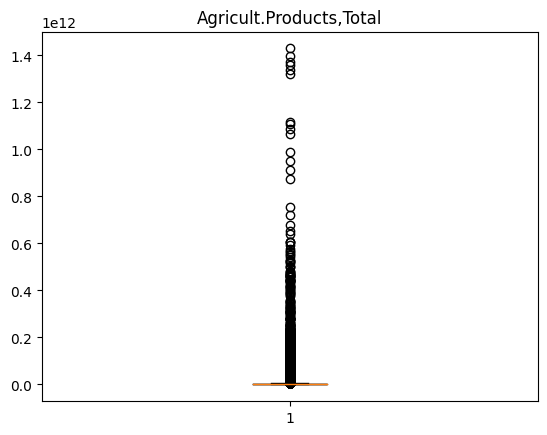

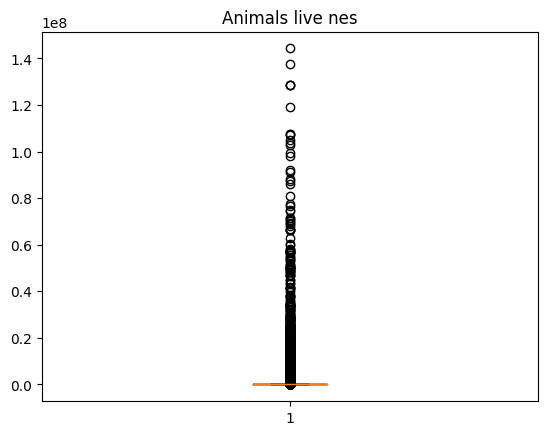

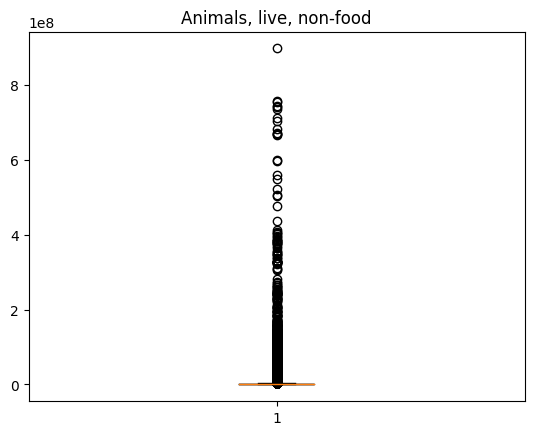

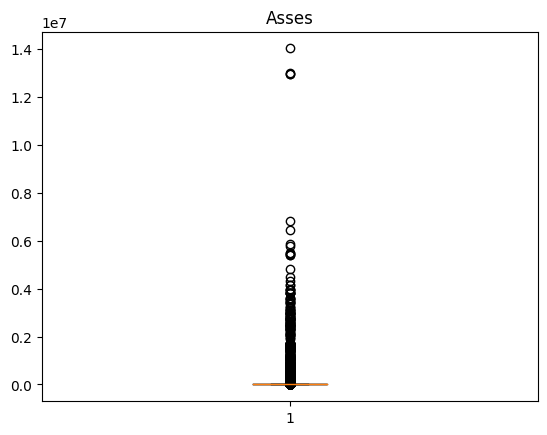

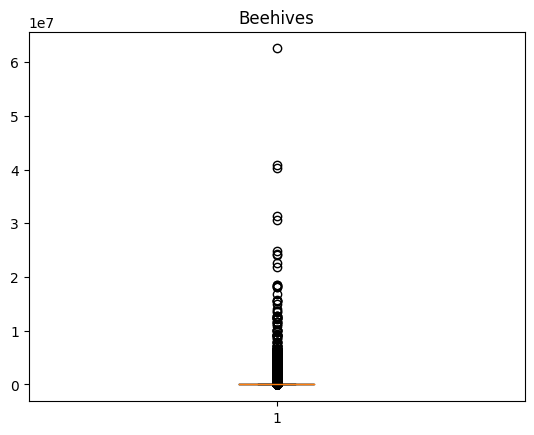

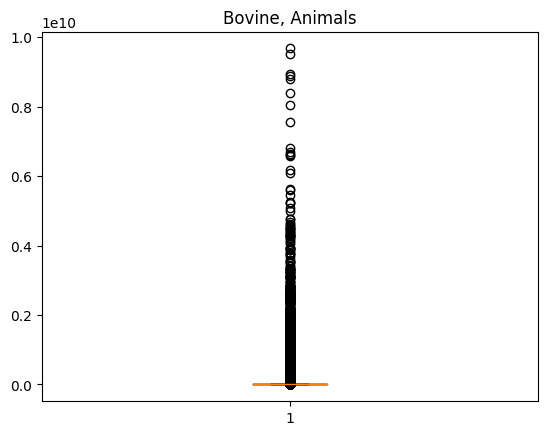

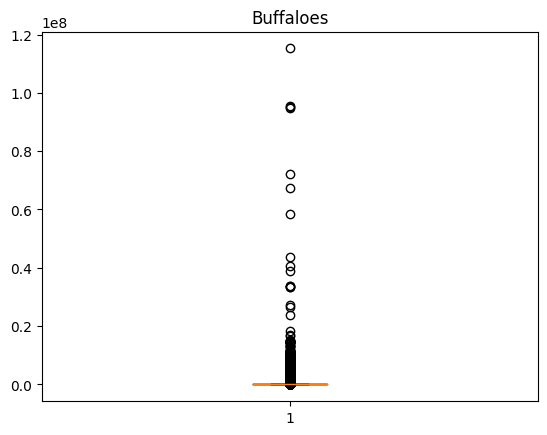

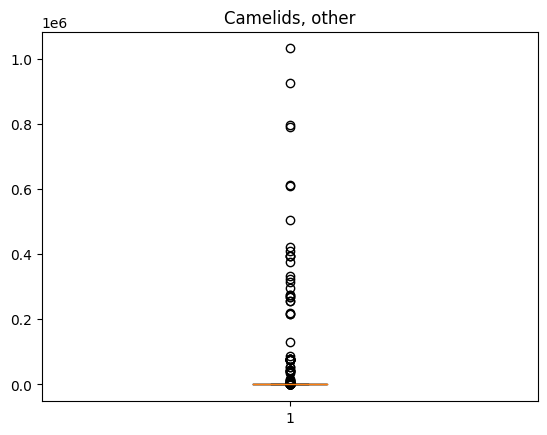

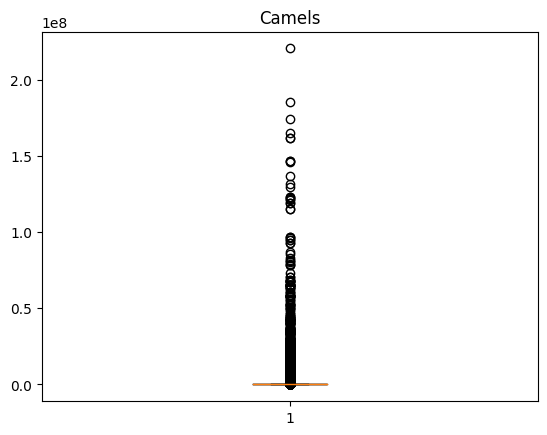

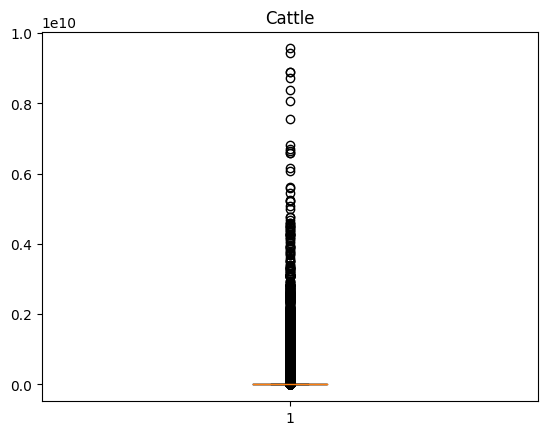

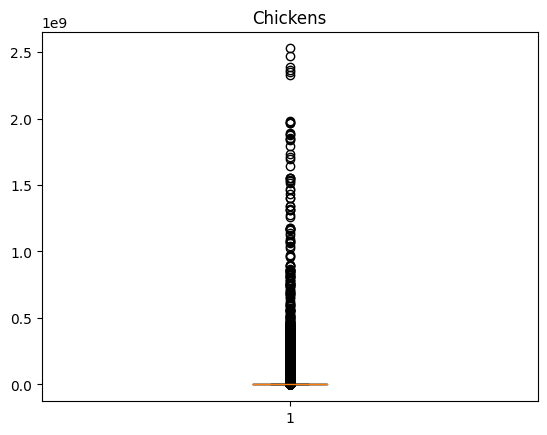

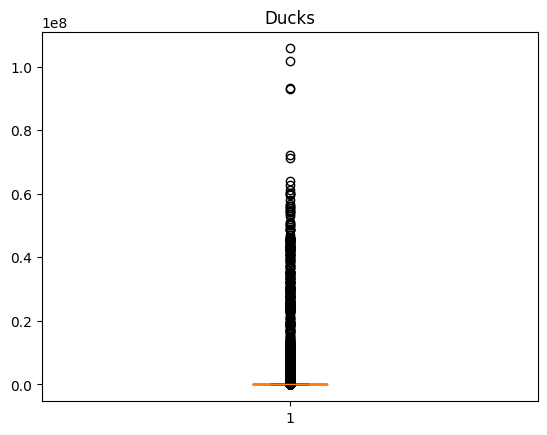

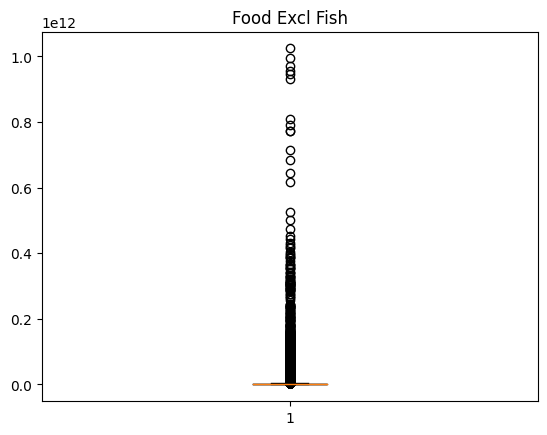

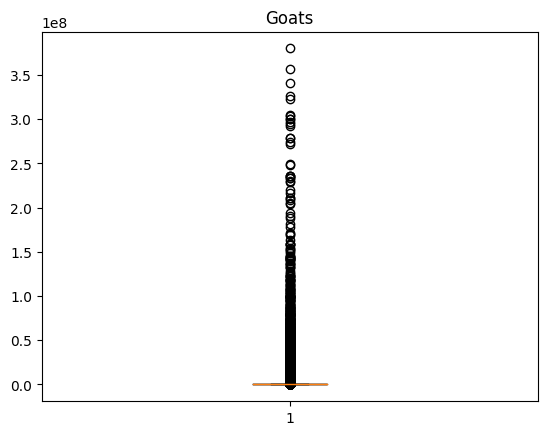

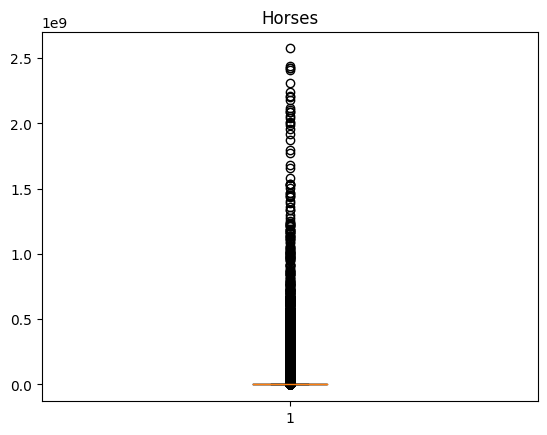

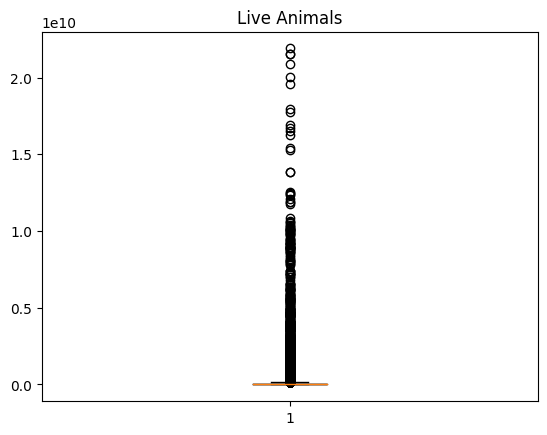

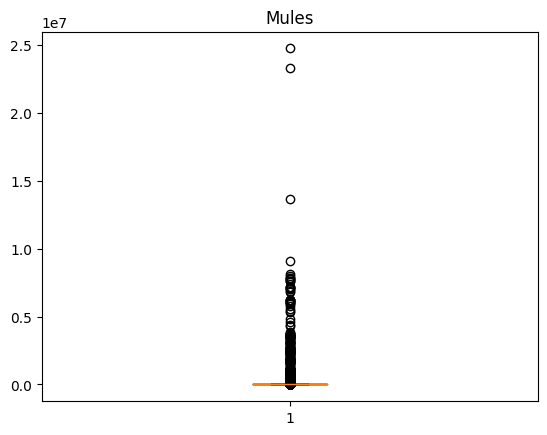

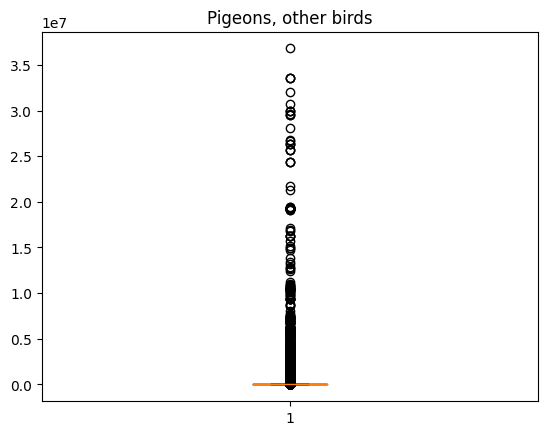

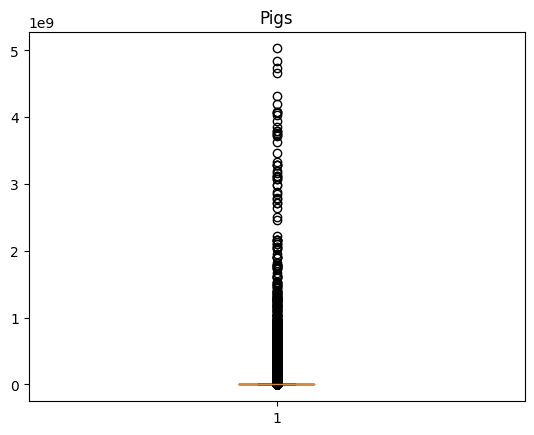

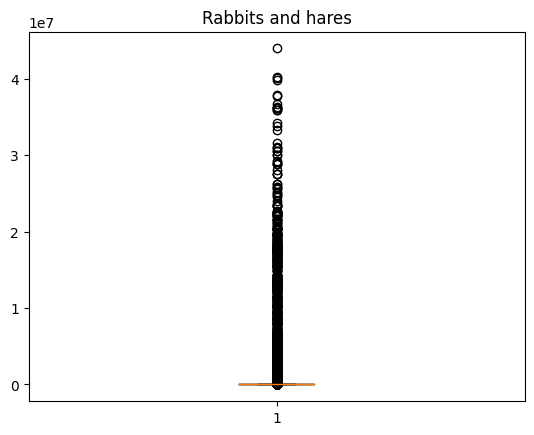

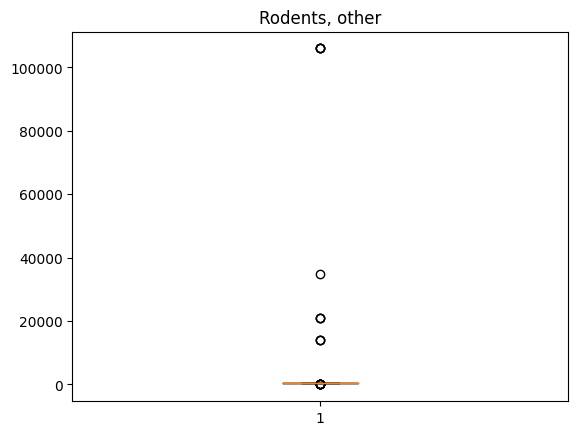

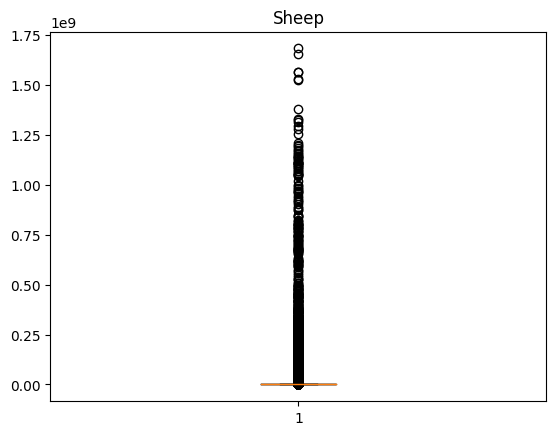

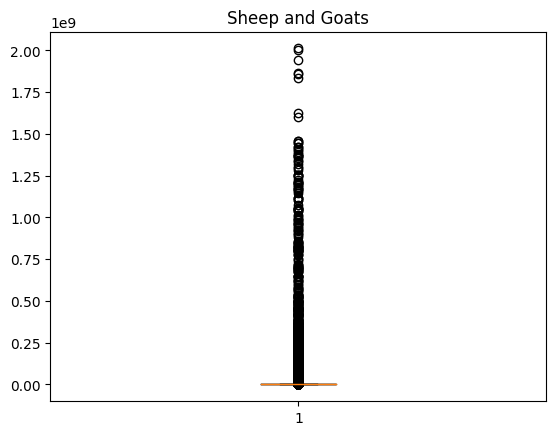

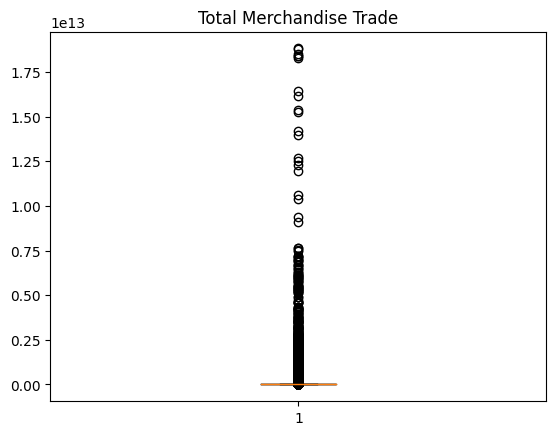

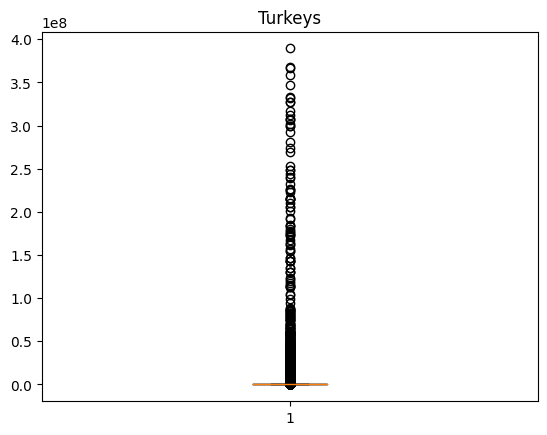

In [47]:
# prompt: Using the df2 dataset, plot Box plots for each of the unique values in the 'Item' column. Sort the dataset by 'Item' column

import matplotlib.pyplot as plt

# Create a box plot for each unique value in the 'Item' column
for item in df2['Item'].unique():
    subset = df2[df2['Item'] == item]
    plt.boxplot(subset['Value'])
    plt.title(item)
    plt.show()

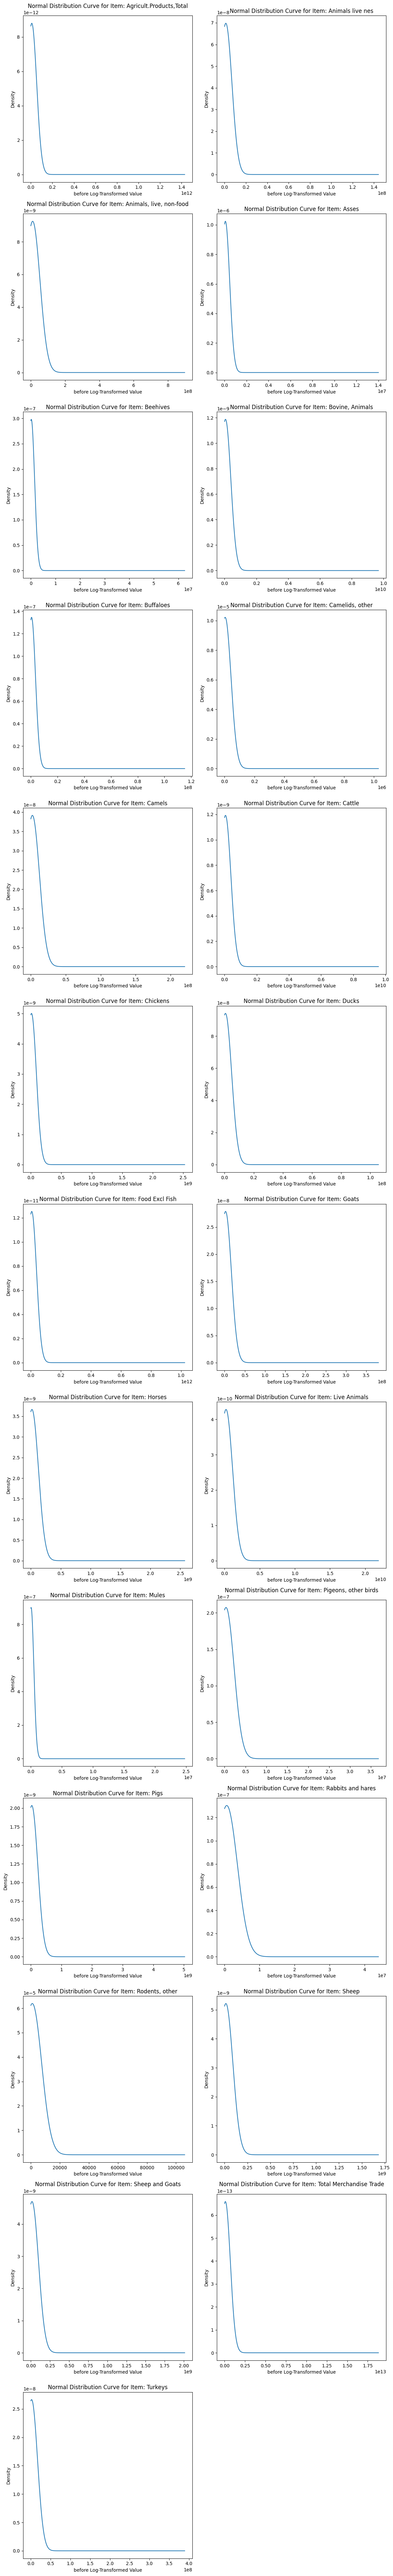

In [48]:
# Let us make normal distribution curves, before log transformation of the 'Value' column in the df2 version of the dataset

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Sort the DataFrame by 'Item' and 'Value'
sorted_df2 = df2.sort_values(by=['Item', 'Value'])

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(sorted_df2['Item'].unique())

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_items)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, item in enumerate(unique_items):
    subset = sorted_df2[sorted_df2['Item'] == item]

    # Log transform the 'Value' column
    #log_transformed_values = np.log(subset['Value'])

    mean_value = subset['Value'].mean()
    std_dev_value = subset['Value'].std()

    x = np.linspace(subset['Value'].min(), subset['Value'].max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Item: {item}')
    ax.set_xlabel('before Log-Transformed Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_items), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

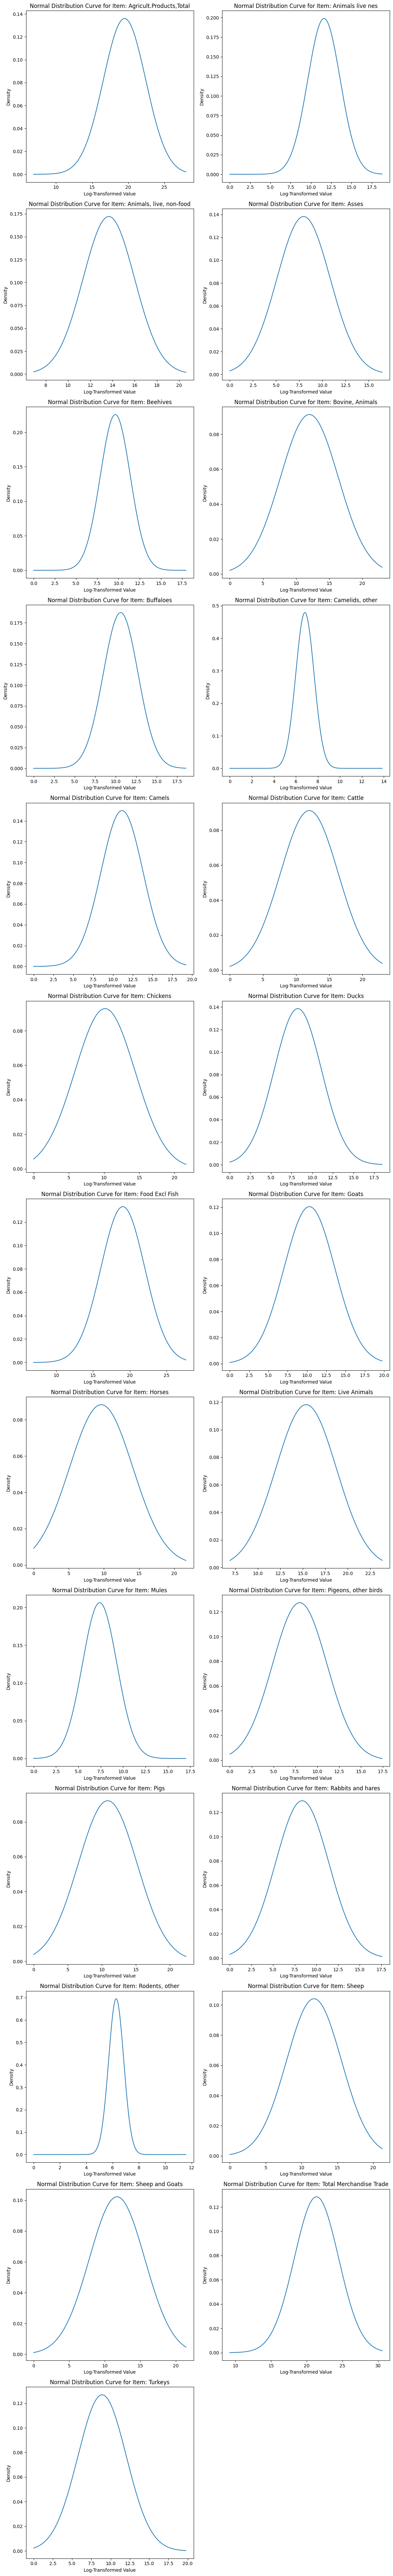

In [50]:
# Let us make normal distribution curves, after log transformation of the 'Value' column in the df4 version of the dataset
# Although the test didn't confirm normal distribution, as we can see below, we have relatively better curves with df4 version of the dataset.

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Sort the DataFrame by 'Item' and 'Value'
sorted_df2 = df2.sort_values(by=['Item', 'Value'])

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(sorted_df2['Item'].unique())

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_items)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, item in enumerate(unique_items):
    subset = sorted_df2[sorted_df2['Item'] == item]

    # Log transform the 'Value' column
    log_transformed_values = np.log(subset['Value'])

    mean_value = log_transformed_values.mean()
    std_dev_value = log_transformed_values.std()

    x = np.linspace(log_transformed_values.min(), log_transformed_values.max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Item: {item}')
    ax.set_xlabel('Log-Transformed Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_items), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [51]:
df2.shape

(495902, 5)

                       Item  Shapiro-Wilk p-value
0   Agricult.Products,Total          4.293482e-29
1          Animals live nes          0.000000e+00
2   Animals, live, non-food          0.000000e+00
3                     Asses          0.000000e+00
4                  Beehives          0.000000e+00
5           Bovine, Animals          3.839081e-40
6                 Buffaloes          0.000000e+00
7           Camelids, other          0.000000e+00
8                    Camels          0.000000e+00
9                    Cattle          2.599367e-40
10                 Chickens          2.791860e-37
11                    Ducks          0.000000e+00
12           Food Excl Fish          7.492120e-31
13                    Goats          0.000000e+00
14                   Horses          0.000000e+00
15             Live Animals          1.105638e-32
16                    Mules          0.000000e+00
17     Pigeons, other birds          0.000000e+00
18                     Pigs          3.068563e-41


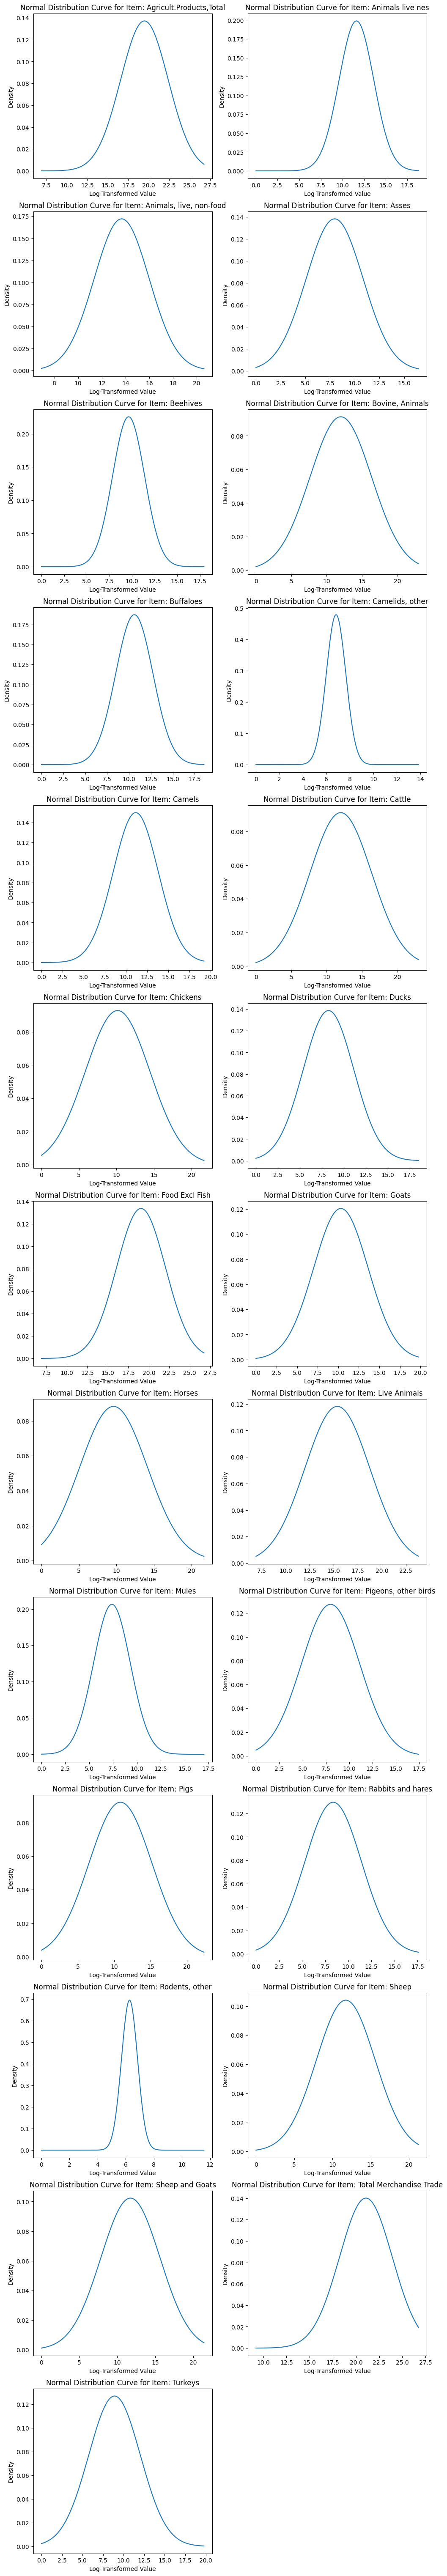

In [52]:
# Test significance of normal distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import warnings
warnings.filterwarnings('ignore')

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
# df2 = pd.read_csv('your_dataset.csv')

# Calculate the mean and standard deviation of the 'Value' column
mean_value = df2['Value'].mean()
std_dev_value = df2['Value'].std()

# Define the lower and upper cutoff values
lower_cutoff = mean_value - (3 * std_dev_value)
upper_cutoff = mean_value + (3 * std_dev_value)

# Filter the DataFrame to include only rows where 'Value' is within the cutoff range
filtered_df2 = df2[(df2['Value'] >= lower_cutoff) & (df2['Value'] <= upper_cutoff)]

# Sort the filtered DataFrame by 'Item' and 'Value'
sorted_df2 = filtered_df2.sort_values(by=['Item', 'Value'])

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(sorted_df2['Item'].unique())

# Create an empty DataFrame to store the Shapiro-Wilk test results
shapiro_results = pd.DataFrame(columns=['Item', 'Shapiro-Wilk p-value'])

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_items)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, item in enumerate(unique_items):
    subset = sorted_df2[sorted_df2['Item'] == item]

    # Log transform the 'Value' column
    log_transformed_values = np.log(subset['Value'])

    mean_value = log_transformed_values.mean()
    std_dev_value = log_transformed_values.std()

    x = np.linspace(log_transformed_values.min(), log_transformed_values.max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Item: {item}')
    ax.set_xlabel('Log-Transformed Value')
    ax.set_ylabel('Density')

    # Perform Shapiro-Wilk test
    _, p_value = shapiro(log_transformed_values)

    # Store the results in the DataFrame
    shapiro_results = shapiro_results.append({'Item': item, 'Shapiro-Wilk p-value': p_value}, ignore_index=True)

# Hide any unused subplots
for index in range(len(unique_items), num_rows * num_cols):
    axes[index].axis('off')

# Print the Shapiro-Wilk test results in table form
print(shapiro_results)




In [53]:
sorted_df2.shape

(494770, 5)

In [54]:
df4 = sorted_df2.copy()

In [55]:
df4.head()

Country                     Item       Element  Year   Value
285321        Maldives  Agricult.Products,Total  Export Value  2009  1000.0
285302        Maldives  Agricult.Products,Total  Export Value  1990  2000.0
285318        Maldives  Agricult.Products,Total  Export Value  2006  2000.0
8159    American Samoa  Agricult.Products,Total  Export Value  2011  3000.0
8158    American Samoa  Agricult.Products,Total  Export Value  2010  3000.0

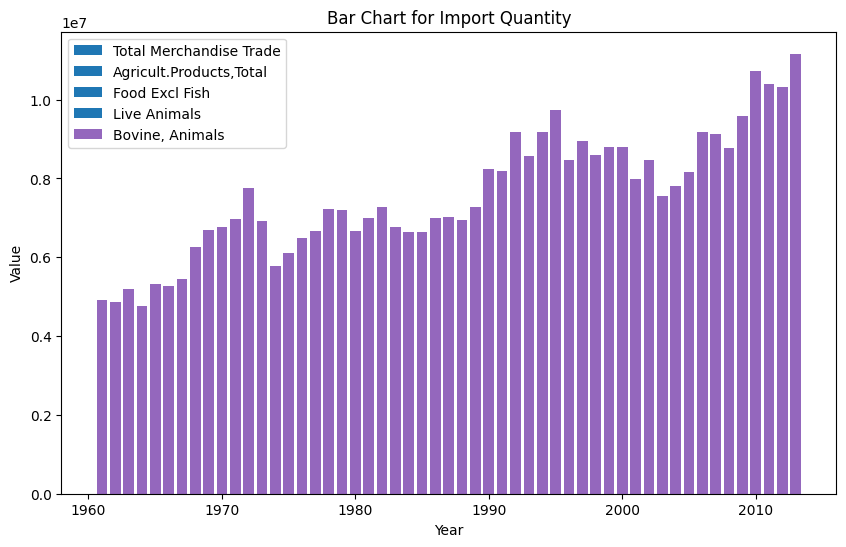

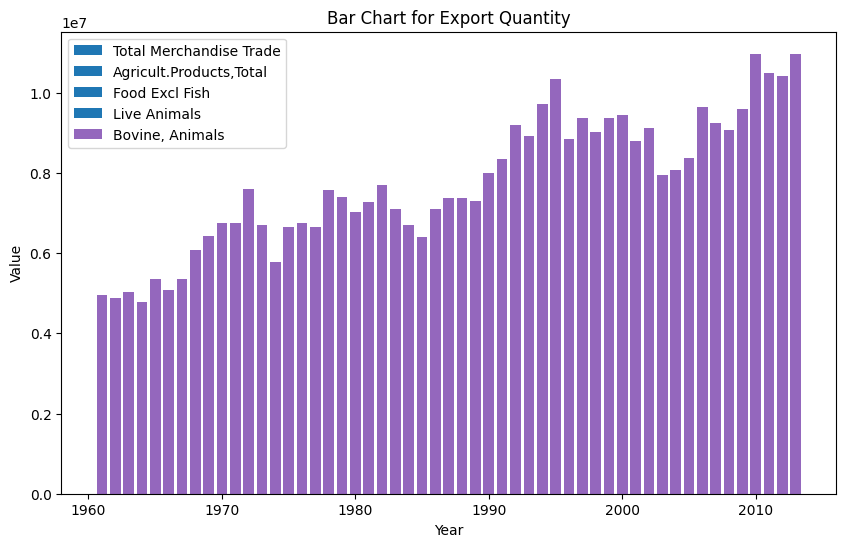

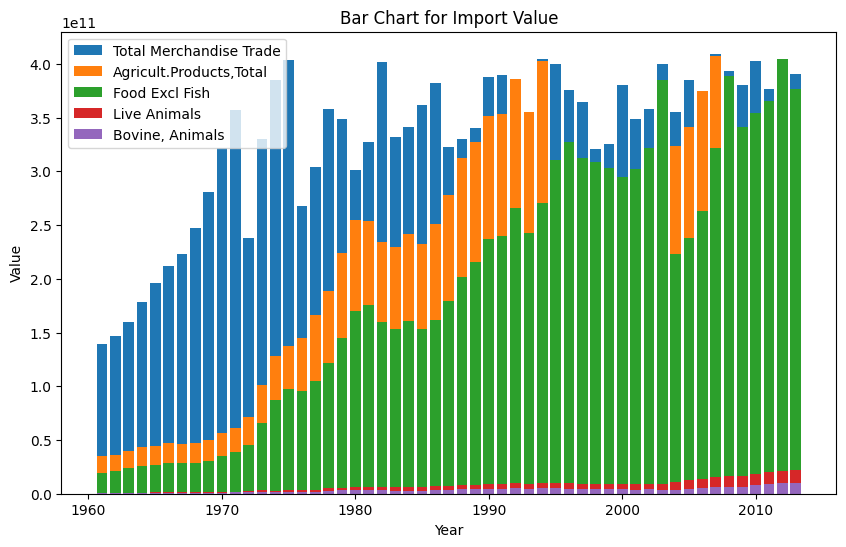

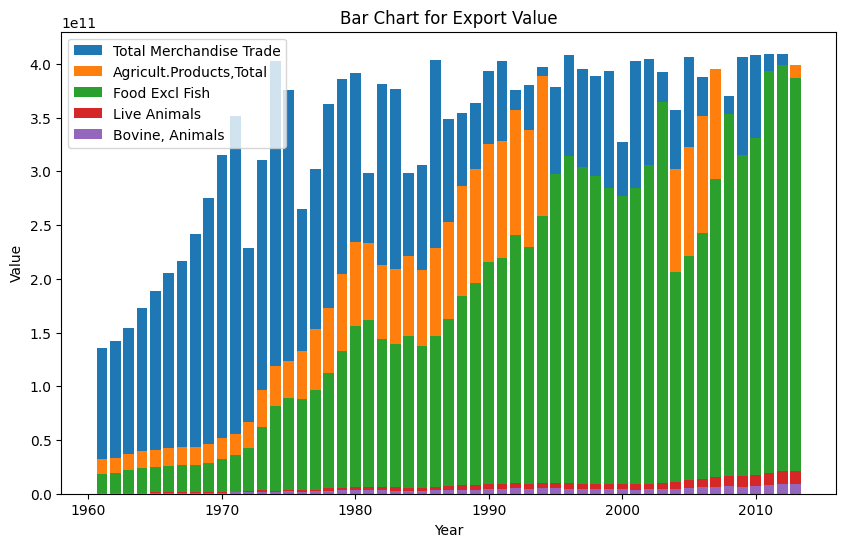

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Get the top 5 items based on the mean 'Value' over the last 15 years
top_items = sorted_df.groupby('Item')['Value'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 items and the 'Element' values of interest
filtered_df = sorted_df[(sorted_df['Item'].isin(top_items)) & (sorted_df['Element'].isin(['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']))]

# Create separate bar charts for each 'Element' value
for element in ['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']:
    plt.figure(figsize=(10, 6))
    plt.title(f'Bar Chart for {element}')

    # Filter the data for the current 'Element'
    element_df = filtered_df[filtered_df['Element'] == element]

    # Create a bar chart for each item
    for item in top_items:
        item_data = element_df[element_df['Item'] == item]

        # Plot the bar chart
        plt.bar(item_data['Year'], item_data['Value'], label=item)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Show the bar chart
    plt.show()


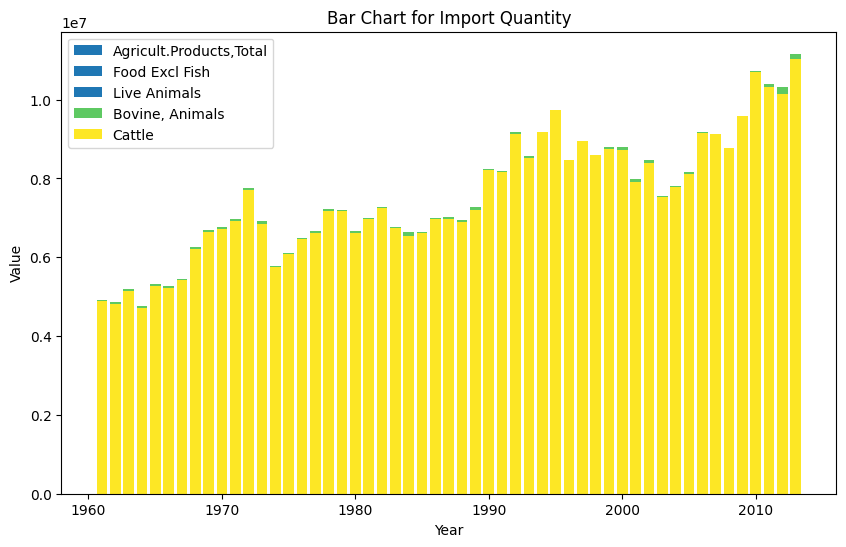

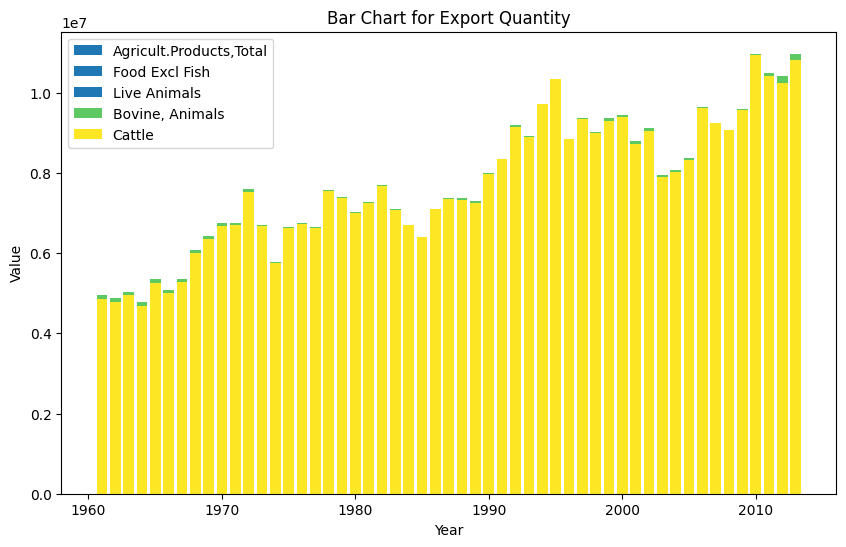

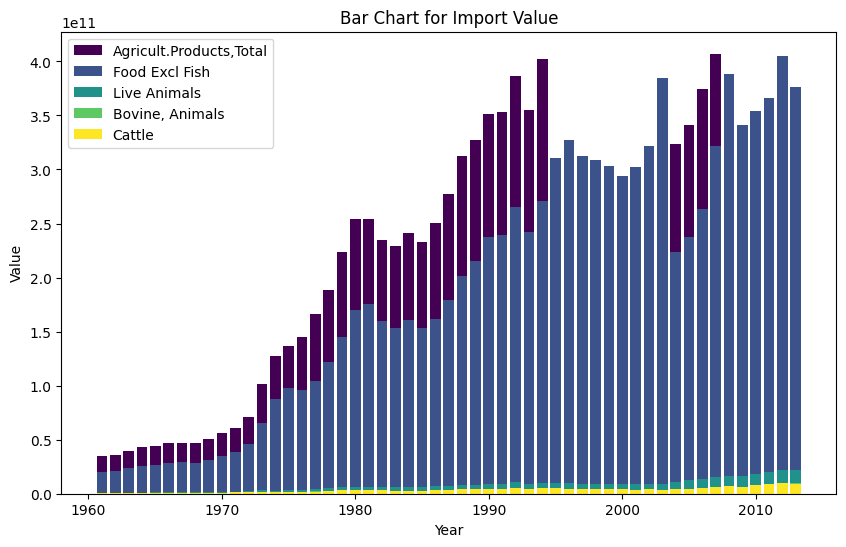

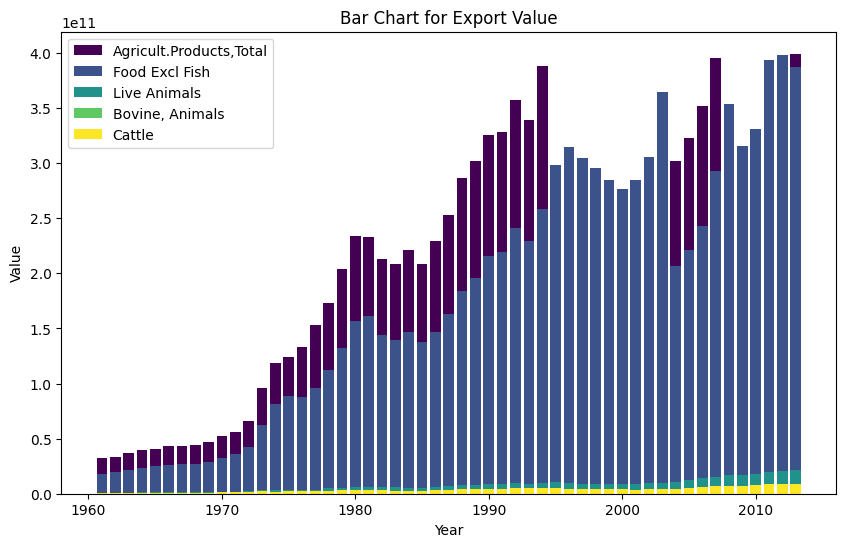

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Get the top 5 items based on the mean 'Value' over the last 15 years (excluding 'Total Merchandise Trade')
top_items = sorted_df[sorted_df['Item'] != 'Total Merchandise Trade'].groupby('Item')['Value'].mean().sort_values(ascending=False).head(5).index

# Define a color map for different items
color_map = plt.cm.get_cmap('viridis', len(top_items))

# Filter the DataFrame for the top 5 items and the 'Element' values of interest
filtered_df = sorted_df[(sorted_df['Item'].isin(top_items)) & (sorted_df['Element'].isin(['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']))]

# Create separate bar charts for each 'Element' value
for element in ['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']:
    plt.figure(figsize=(10, 6))
    plt.title(f'Bar Chart for {element}')

    # Filter the data for the current 'Element'
    element_df = filtered_df[filtered_df['Element'] == element]

    # Create a bar chart for each item with a different color
    for i, item in enumerate(top_items):
        item_data = element_df[element_df['Item'] == item]

        # Plot the bar chart with a unique color
        plt.bar(item_data['Year'], item_data['Value'], label=item, color=color_map(i))

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Show the bar chart
    plt.show()


In [ ]:
#Q2 descriptive
import pandas as pd

# Filter the dataset for the specific agricultural item you're interested in (e.g., 'Wheat')
item = 'Cattle'
filtered_df = df4[df4['Item'] == item]

# Filter data for the last 15 years (assuming the dataset includes a 'Year' column)
last_15_years_df = filtered_df[filtered_df['Year'] >= (filtered_df['Year'].max() - 15)]

# Group the data by country, year, and element, and calculate the total value for each group
country_year_element_totals = last_15_years_df.groupby(['Country', 'Year', 'Element'])['Value'].sum().reset_index()

# Pivot the data to have 'Country' and 'Year' as index and columns for 'Element'
pivot_df = country_year_element_totals.pivot(index=['Country', 'Year'], columns='Element', values='Value').reset_index()

# Calculate the change in export quantity for each country-year compared to the previous year
pivot_df['Export Quantity Change'] = pivot_df.groupby('Country')['Export Quantity'].diff()

# Identify countries and years with significant changes in export quantity (you can adjust the threshold)
significant_changes = pivot_df[abs(pivot_df['Export Quantity Change']) >= 100000]

# Print the list of countries and years with significant changes in export quantity
print("Countries and Years with Significant Changes in Export Quantity:")
print(significant_changes[['Country', 'Year', 'Export Quantity Change']])



Countries and Years with Significant Changes in Export Quantity:
Element Country  Year  Export Quantity Change
20       Africa  2002               -189510.0
22       Africa  2004                231626.0
26       Africa  2008                108968.0
28       Africa  2010                133016.0
31       Africa  2013                489312.0
...         ...   ...                     ...
3202      World  2009                502953.0
3203      World  2010               1354230.0
3204      World  2011               -521421.0
3205      World  2012               -181047.0
3206      World  2013                590024.0

[327 rows x 3 columns]


In [ ]:
#Q3 descriptive

# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset file)
# df4 = pd.read_csv('your_dataset.csv')  # Already loaded in your environment

# Filter the dataset for the specific agricultural item you're interested in (e.g., 'Wheat')
item = 'Cattle'
filtered_df = df4[df4['Item'] == item]

# Filter data for the last 15 years (assuming the dataset includes a 'Year' column)
last_15_years_df = filtered_df[filtered_df['Year'] >= (filtered_df['Year'].max() - 15)]

# Group the data by country and year, and calculate the total import and export quantities for each country-year
country_year_totals = last_15_years_df.groupby(['Country', 'Year', 'Element'])[['Value']].sum().reset_index()

# Select the top 10 countries with the highest export quantities in the last 15 years
top_10_exporting_countries = country_year_totals[country_year_totals['Element'] == 'Export Quantity'].groupby('Country')['Value'].sum().nlargest(10).index

# Calculate the average export quantity for each of the top 10 countries
average_export_quantity = country_year_totals[country_year_totals['Country'].isin(top_10_exporting_countries) & (country_year_totals['Element'] == 'Export Quantity')].groupby('Country')['Value'].mean()

# Print the list of top 10 exporting countries and their average export quantities
print("Top 10 Exporting Countries in the Last 15 Years:")
print(top_10_exporting_countries)

print("\nAverage Export Quantity for Each Top 10 Exporting Country:")
print(average_export_quantity)




Top 10 Exporting Countries in the Last 15 Years:
Index(['World', 'Europe', 'European Union', 'Americas', 'Western Europe',
       'France', 'Central America', 'Northern America', 'Mexico',
       'Net Food Importing Developing Countries'],
      dtype='object', name='Country')

Average Export Quantity for Each Top 10 Exporting Country:
Country
Americas                                   2.943026e+06
Central America                            1.261616e+06
Europe                                     4.283787e+06
European Union                             4.245269e+06
France                                     1.479813e+06
Mexico                                     1.187076e+06
Net Food Importing Developing Countries    1.084952e+06
Northern America                           1.206583e+06
Western Europe                             2.637830e+06
World                                      9.349108e+06
Name: Value, dtype: float64


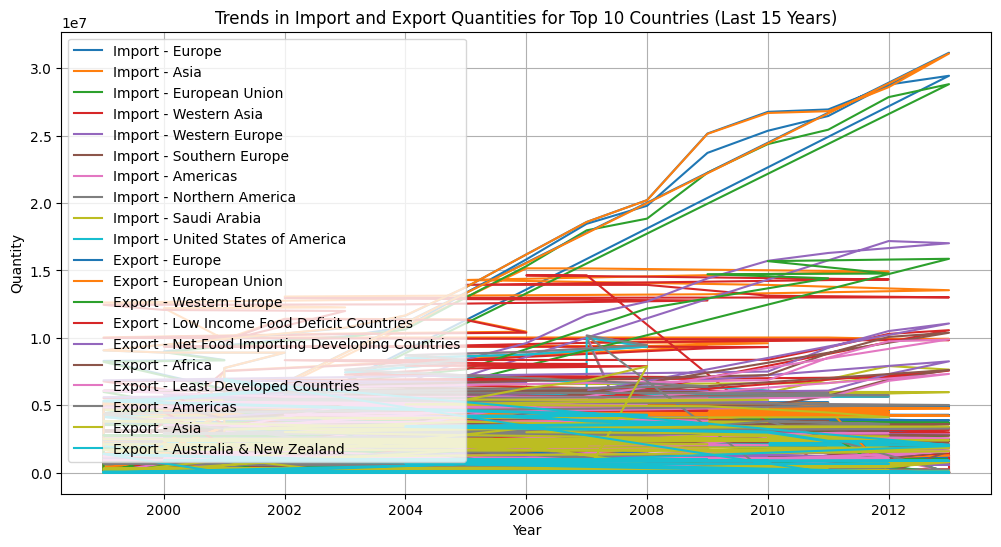

In [ ]:
#Viz Q1

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Exclude 'World' from the 'Country' column
df_last_15_years = df_last_15_years[df_last_15_years['Country'] != 'World']

# Group data by 'Country' and calculate the total import and export quantities for each country
country_imports = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity'].groupby('Country')['Value'].sum().sort_values(ascending=False)[:10]
country_exports = df_last_15_years[df_last_15_years['Element'] == 'Export Quantity'].groupby('Country')['Value'].sum().sort_values(ascending=False)[:10]

# Create a line plot to visualize trends in import and export quantities for the top 10 countries
plt.figure(figsize=(12, 6))
for country in country_imports.index:
    imports_data = df_last_15_years[(df_last_15_years['Country'] == country) & (df_last_15_years['Element'] == 'Import Quantity')]
    plt.plot(imports_data['Year'], imports_data['Value'], label=f'Import - {country}')

for country in country_exports.index:
    exports_data = df_last_15_years[(df_last_15_years['Country'] == country) & (df_last_15_years['Element'] == 'Export Quantity')]
    plt.plot(exports_data['Year'], exports_data['Value'], label=f'Export - {country}')

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Trends in Import and Export Quantities for Top 10 Countries (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()




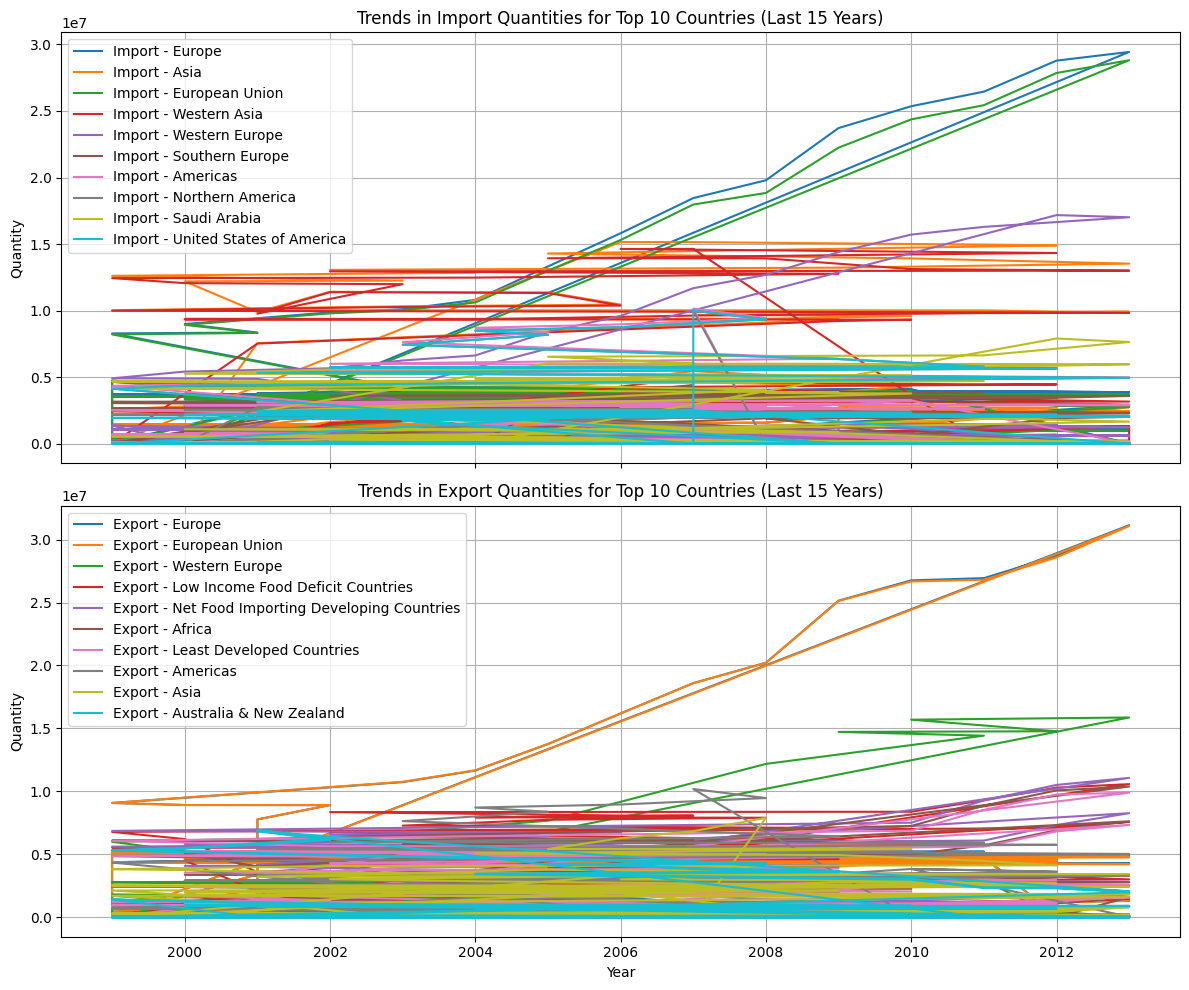

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Exclude 'World' from the 'Country' column
df_last_15_years = df_last_15_years[df_last_15_years['Country'] != 'World']

# Group data by 'Country' and calculate the total import and export quantities for each country
country_imports = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity'].groupby('Country')['Value'].sum().sort_values(ascending=False)[:10]
country_exports = df_last_15_years[df_last_15_years['Element'] == 'Export Quantity'].groupby('Country')['Value'].sum().sort_values(ascending=False)[:10]

# Create two separate subplots for import and export trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot import quantities
for country in country_imports.index:
    imports_data = df_last_15_years[(df_last_15_years['Country'] == country) & (df_last_15_years['Element'] == 'Import Quantity')]
    ax1.plot(imports_data['Year'], imports_data['Value'], label=f'Import - {country}')

ax1.set_ylabel('Quantity')
ax1.set_title('Trends in Import Quantities for Top 10 Countries (Last 15 Years)')
ax1.legend()
ax1.grid(True)

# Plot export quantities
for country in country_exports.index:
    exports_data = df_last_15_years[(df_last_15_years['Country'] == country) & (df_last_15_years['Element'] == 'Export Quantity')]
    ax2.plot(exports_data['Year'], exports_data['Value'], label=f'Export - {country}')

ax2.set_xlabel('Year')
ax2.set_ylabel('Quantity')
ax2.set_title('Trends in Export Quantities for Top 10 Countries (Last 15 Years)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Viz Q2

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Exclude 'World' from the 'Country' column
df_last_15_years = df_last_15_years[df_last_15_years['Country'] != 'World']

# Group data by 'Country' and calculate total import and export quantities for each year
yearly_imports = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity'].groupby(['Year', 'Country'])['Value'].sum()
yearly_exports = df_last_15_years[df_last_15_years['Element'] == 'Export Quantity'].groupby(['Year', 'Country'])['Value'].sum()

# Define a threshold for significant changes (you can adjust this threshold as needed)
significant_change_threshold = 1000000  # Adjust this threshold according to your data

# Create a dictionary to store significant changes in import and export years by country
significant_import_years = {}
significant_export_years = {}

# Iterate through the top 10 countries
top_10_countries = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity'].groupby('Country')['Value'].sum().nlargest(10).index

for country in top_10_countries:
    if country not in yearly_imports.index.get_level_values('Country'):
        continue

    import_changes = yearly_imports[country].diff().abs() > significant_change_threshold
    export_changes = yearly_exports[country].diff().abs() > significant_change_threshold

    significant_import_years[country] = yearly_imports[country][import_changes].index.tolist()
    significant_export_years[country] = yearly_exports[country][export_changes].index.tolist()

# Visualize the significant changes in import and export years
plt.figure(figsize=(12, 6))
for country in top_10_countries:
    if country not in yearly_imports.index.get_level_values('Country'):
        continue

    plt.plot(
        yearly_imports.loc[:, country].index,
        yearly_imports.loc[:, country],
        label=f'Import - {country}',
    )

for country in top_10_countries:
    if country not in yearly_exports.index.get_level_values('Country'):
        continue

    plt.plot(
        yearly_exports.loc[:, country].index,
        yearly_exports.loc[:, country],
        label=f'Export - {country}',
    )

for country, years in significant_import_years.items():
    if country not in yearly_imports.index.get_level_values('Country'):
        continue

    plt.scatter(
        years,
        yearly_imports.loc[:, country].loc[years],
        color='red',
        label=f'Significant Import Changes - {country}',
        zorder=5,
    )

for country, years in significant_export_years.items():
    if country not in yearly_exports.index.get_level_values('Country'):
        continue

    plt.scatter(
        years,
        yearly_exports.loc[:, country].loc[years],
        color='green',
        label=f'Significant Export Changes - {country}',
        zorder=5,
    )

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Trends in Import and Export Quantities with Significant Changes (Top 10 Countries, Last 15 Years)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



KeyError: ignored

In [ ]:
# Viz Q3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Exclude 'World' from the 'Country' column
df_last_15_years = df_last_15_years[~df_last_15_years['Country'].str.contains('World')]

# Split the lists of countries into separate rows
df_last_15_years = df_last_15_years.explode('Country')

# Group data by 'Country' and calculate total import and export quantities for each year
yearly_imports = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity'].groupby(['Year', 'Country'])['Value'].sum()
yearly_exports = df_last_15_years[df_last_15_years['Element'] == 'Export Quantity'].groupby(['Year', 'Country'])['Value'].sum()

# Get the unique list of countries
unique_countries = df_last_15_years['Country'].unique()

# Initialize a dictionary to store predicted import and export quantities for each country
predicted_imports = {}
predicted_exports = {}

# Create a list of future years for prediction
future_years = range(current_year + 1, current_year + 6)

# Initialize the linear regression models for each country
import_model = LinearRegression()
export_model = LinearRegression()

# Iterate through each unique country for prediction
for country in unique_countries:
    # Get the historical import and export data for the current country
    country_imports = yearly_imports[country].values.reshape(-1, 1)
    country_exports = yearly_exports[country].values.reshape(-1, 1)

    # Fit the models to the historical data
    import_model.fit([[year] for year in years_to_consider], country_imports)
    export_model.fit([[year] for year in years_to_consider], country_exports)

    # Predict future import and export quantities for the current country
    predicted_imports[country] = import_model.predict([[year] for year in future_years])
    predicted_exports[country] = export_model.predict([[year] for year in future_years])

# Visualize the historical and predicted data for each country
for country in unique_countries:
    plt.figure(figsize=(12, 6))
    plt.plot(years_to_consider, yearly_imports[country], label=f'Historical Import - {country}')
    plt.plot(years_to_consider, yearly_exports[country], label=f'Historical Export - {country}')
    plt.plot(future_years, predicted_imports[country], linestyle='--', label=f'Predicted Import - {country}')
    plt.plot(future_years, predicted_exports[country], linestyle='--', label=f'Predicted Export - {country}')
    plt.xlabel('Year')
    plt.ylabel('Quantity')
    plt.title(f'Historical and Predicted Import/Export Quantities for {country}')
    plt.legend()
    plt.grid(True)
    plt.show()



KeyError: ignored

ValueError: ignored

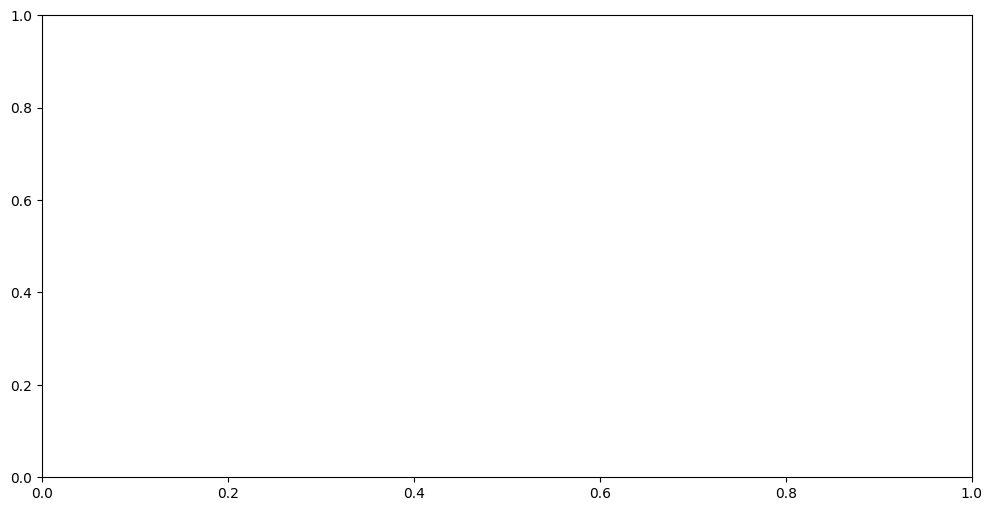

In [ ]:
#Viz Q4


import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset 'df4' has columns 'Year', 'Country', and 'Element'
# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Group data by 'Country' and calculate total import and export quantities for each year
yearly_imports = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity']
yearly_exports = df_last_15_years[df_last_15_years['Element'] == 'Export Quantity']

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'CountryName'  # Replace 'CountryName' with the actual country name

# Get the import and export quantities for the selected country
country_imports = yearly_imports[yearly_imports['Country'] == country_to_analyze]
country_exports = yearly_exports[yearly_exports['Country'] == country_to_analyze]

# Calculate the trade balance (exports - imports) for the selected country
trade_balance = country_exports.groupby('Year')['Value'].sum() - country_imports.groupby('Year')['Value'].sum()

# Visualize the trade balance over the last 15 years
plt.figure(figsize=(12, 6))
plt.plot(years_to_consider, trade_balance, label=f'Trade Balance - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Trade Balance')
plt.title(f'Trade Balance for {country_to_analyze} (Last 15 Years)')
plt.axhline(0, color='red', linestyle='--', label='Zero Trade Balance')
plt.legend()
plt.grid(True)
plt.show()


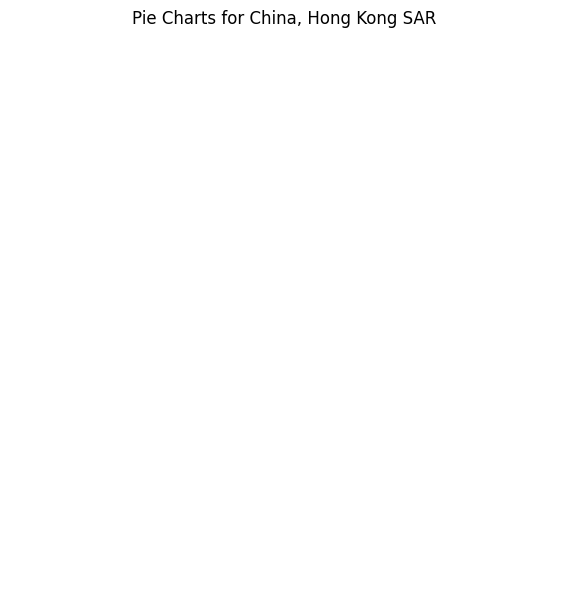

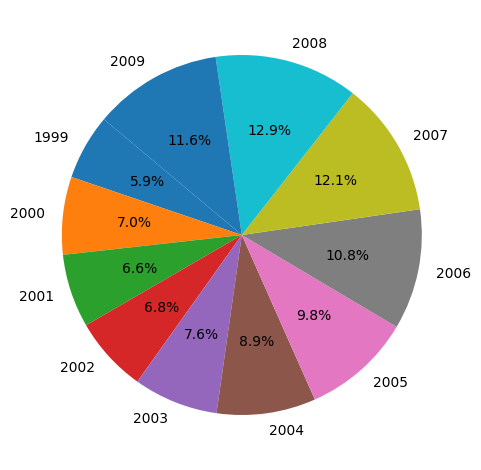

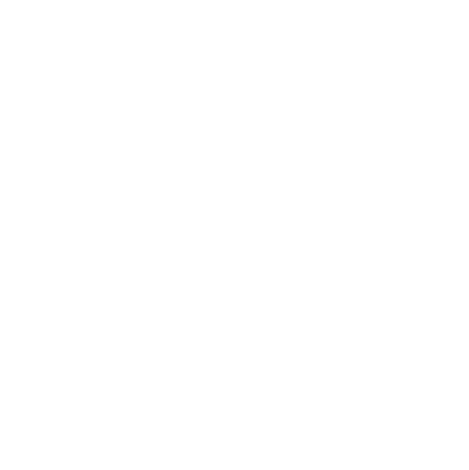

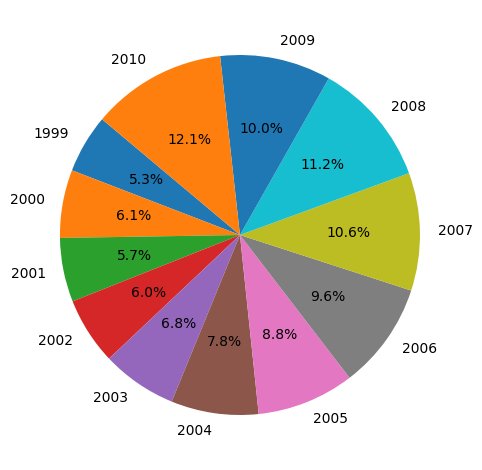

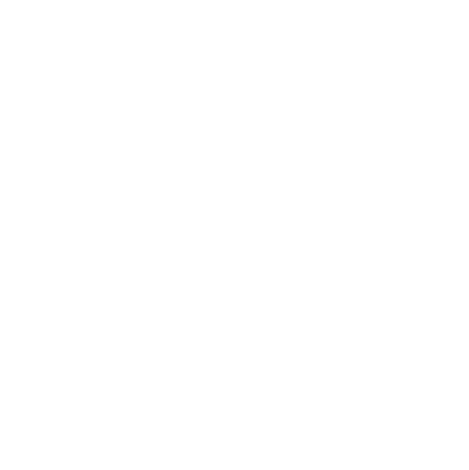

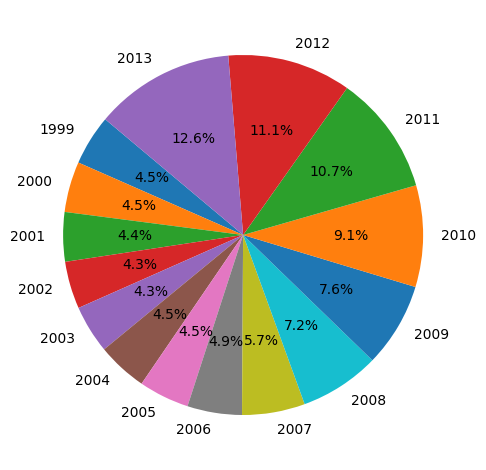

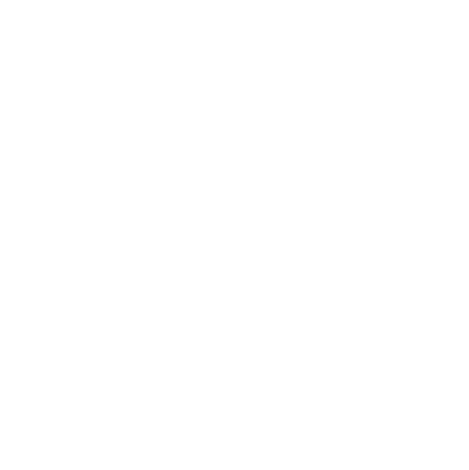

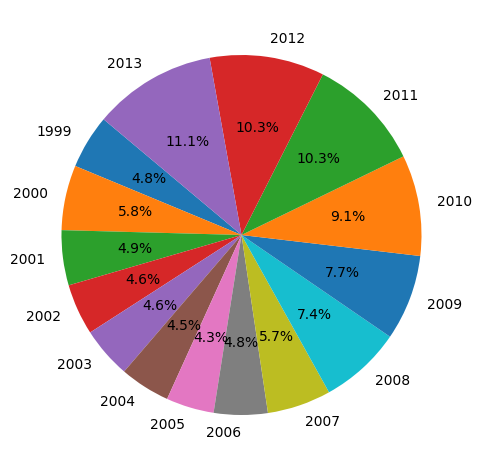

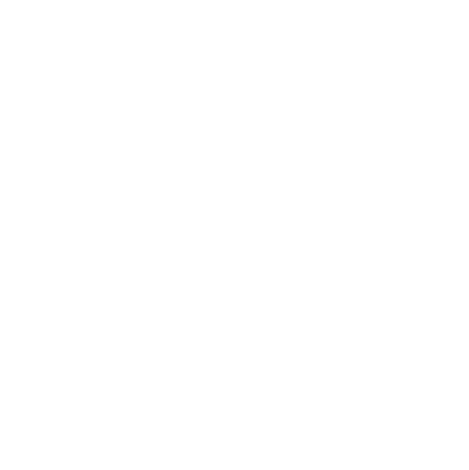

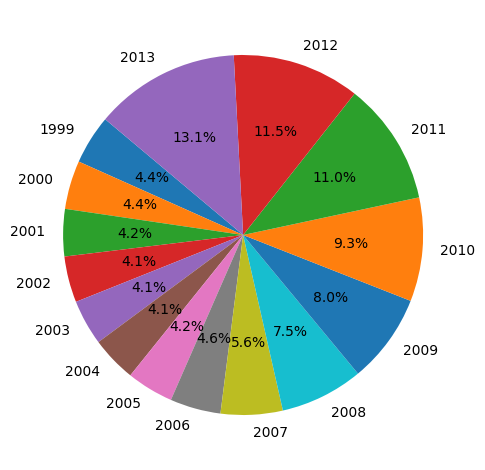

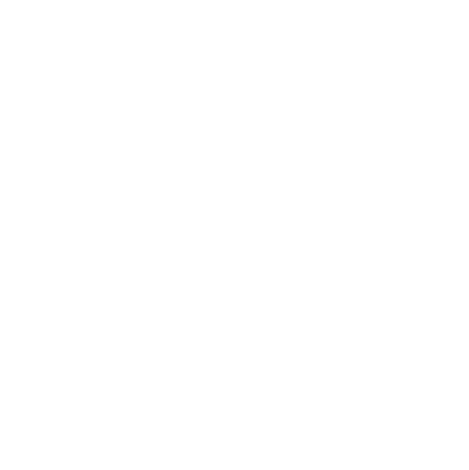

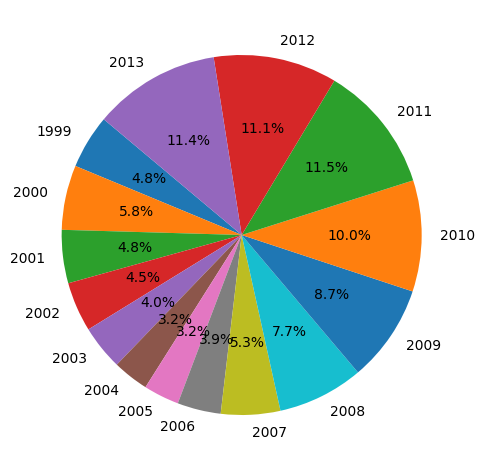

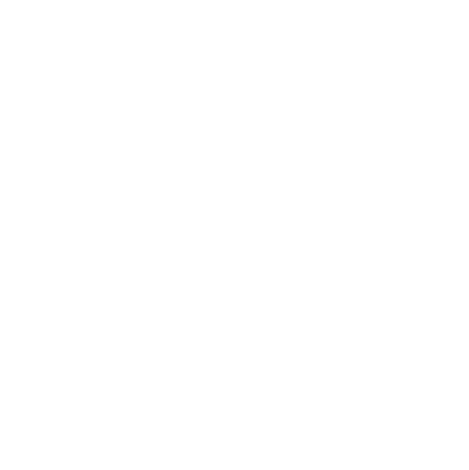

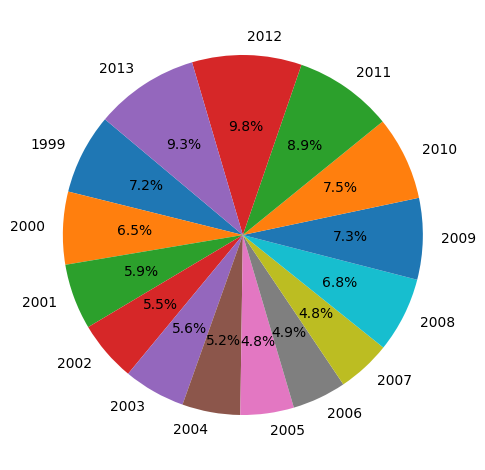

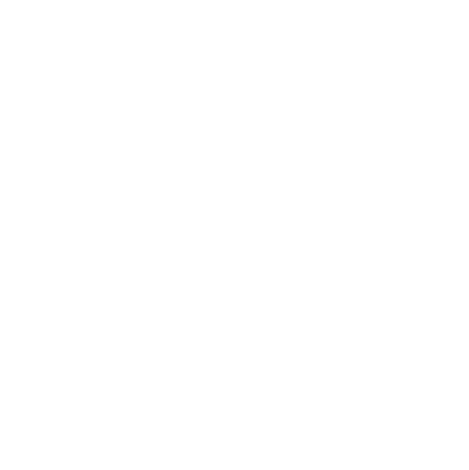

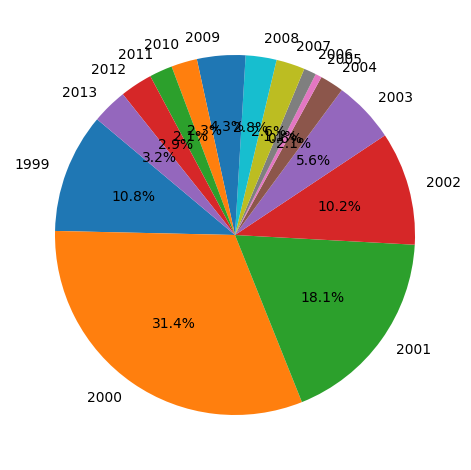

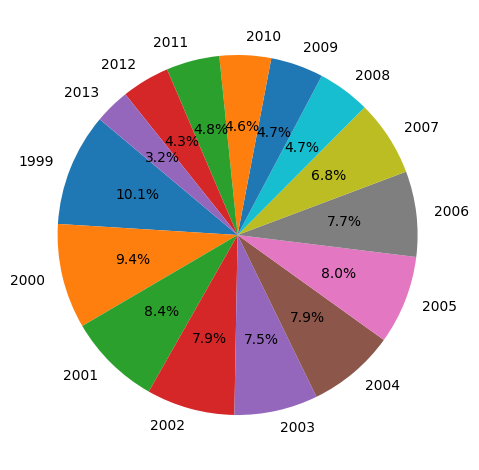

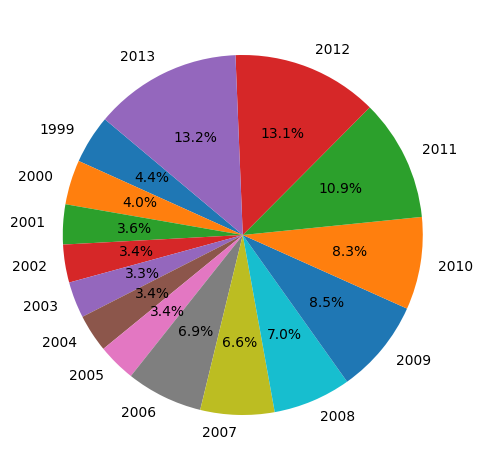

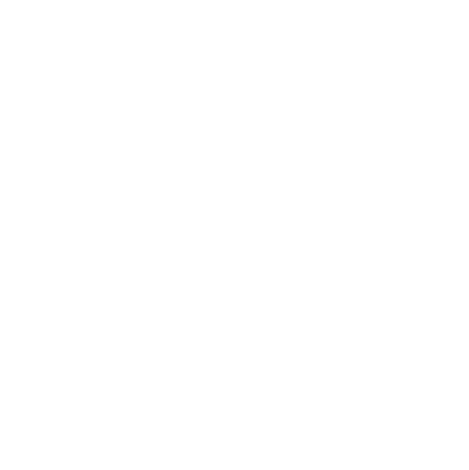

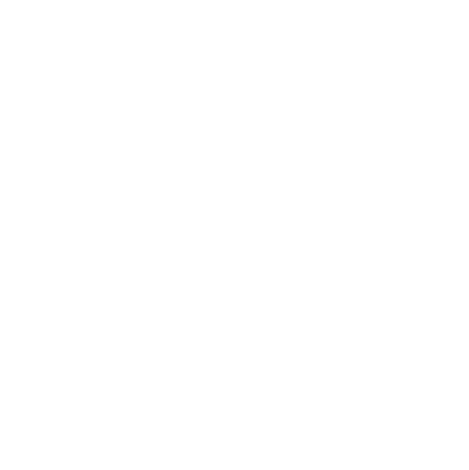

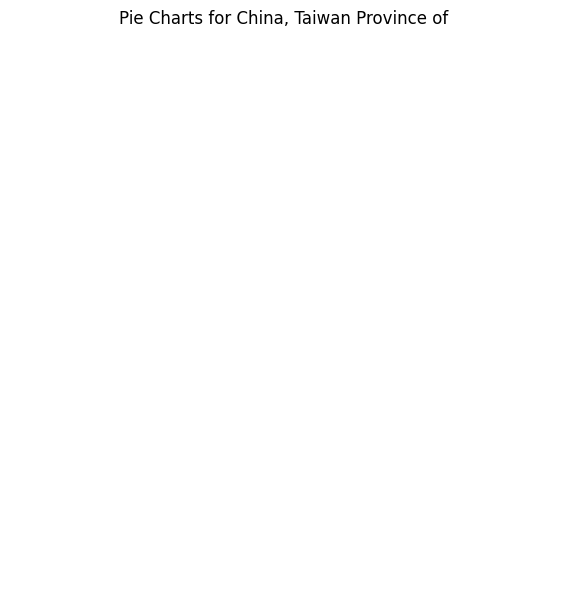

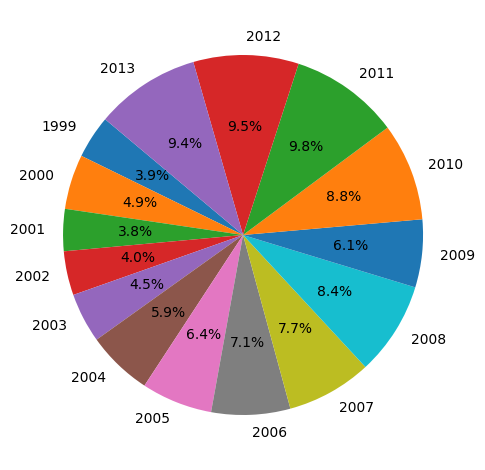

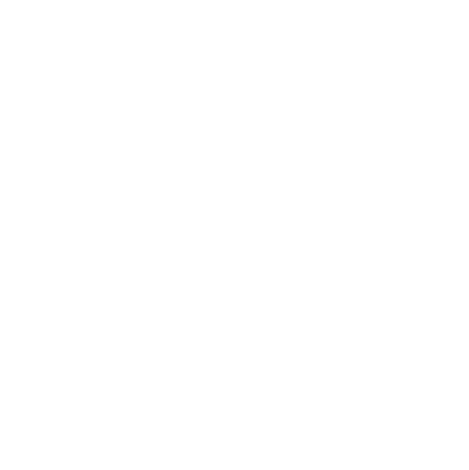

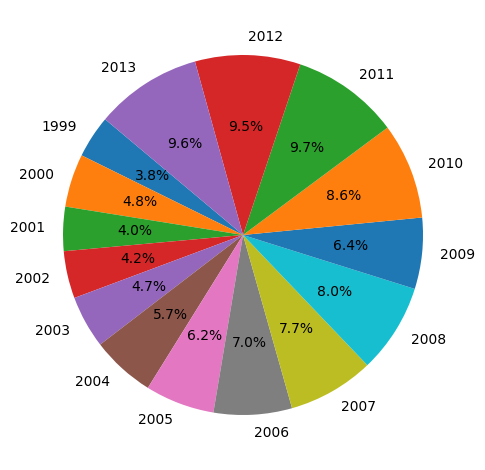

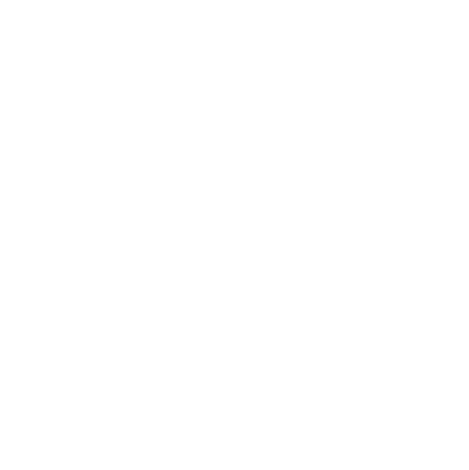

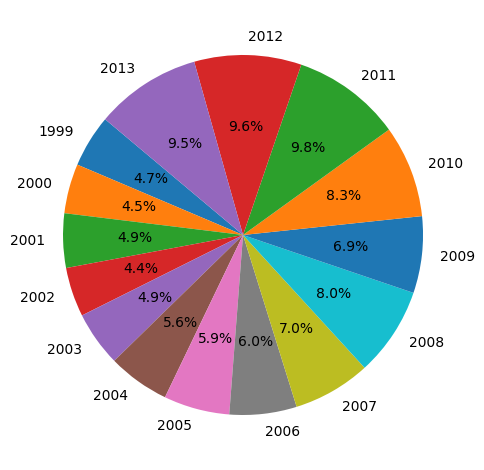

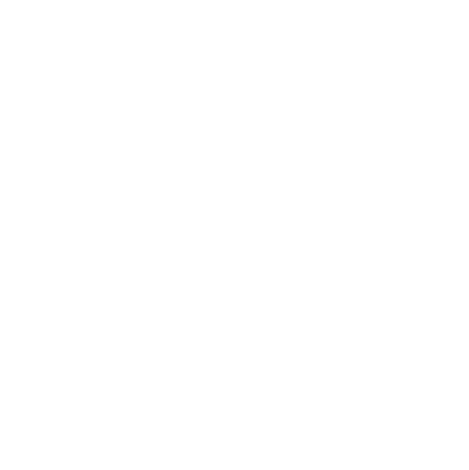

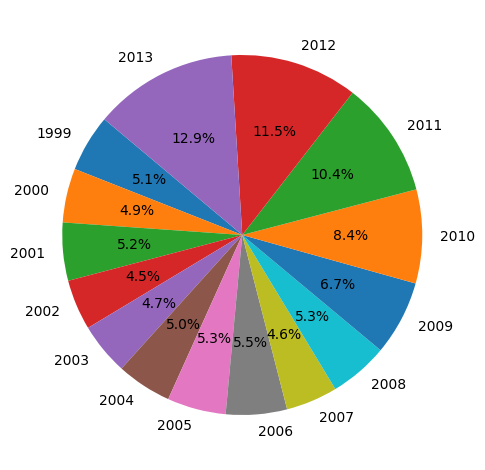

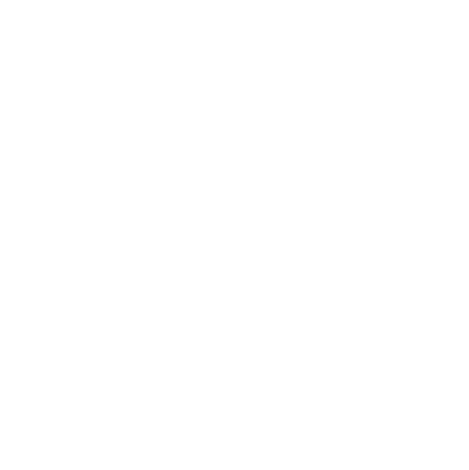

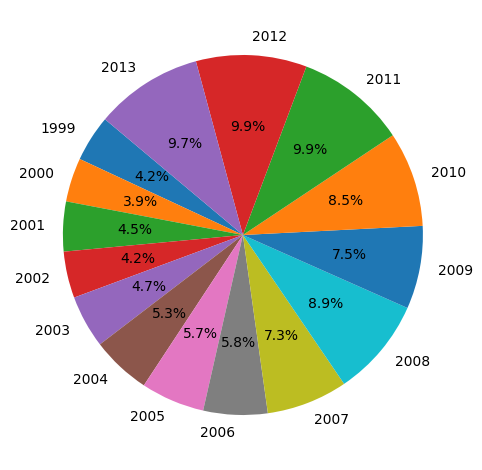

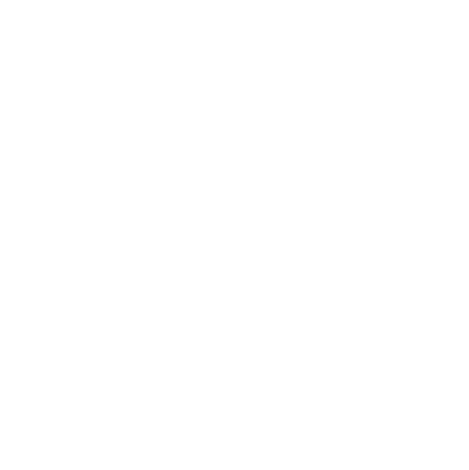

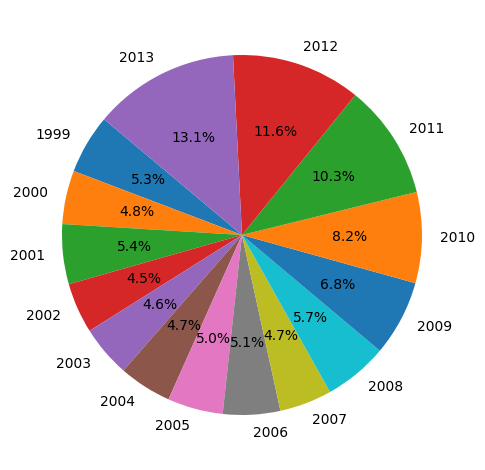

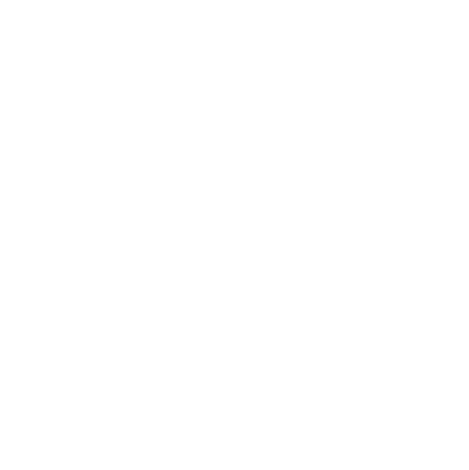

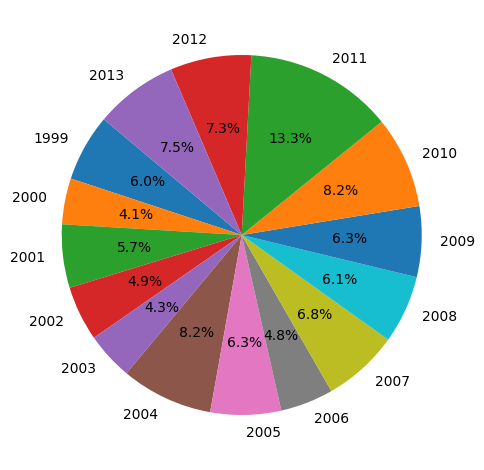

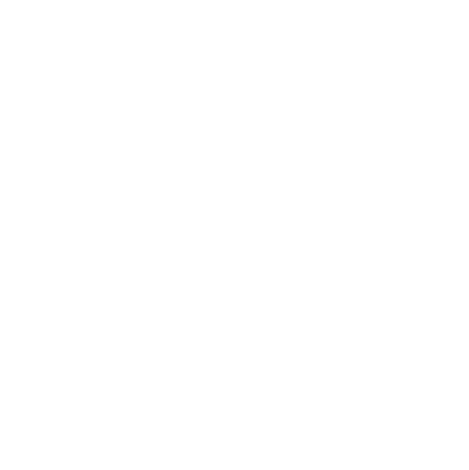

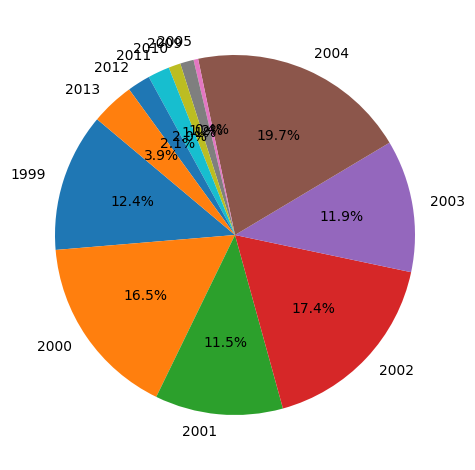

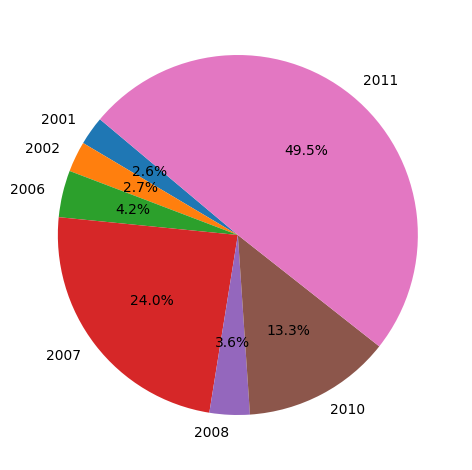

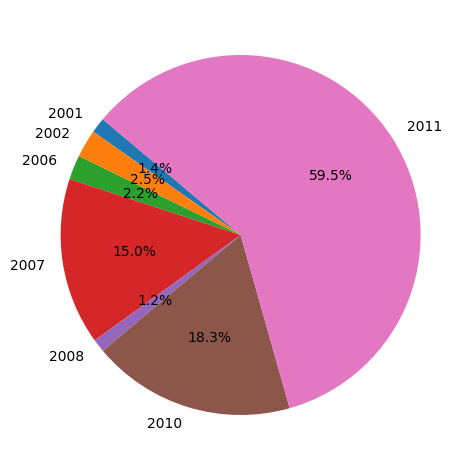

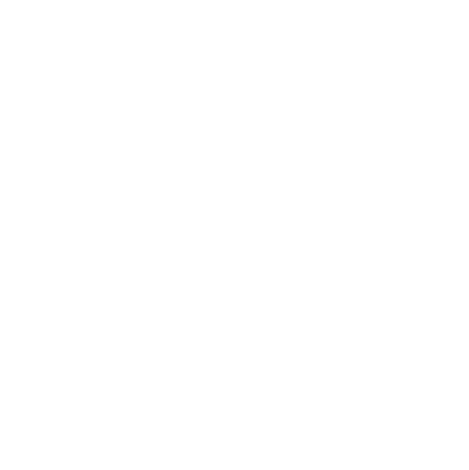

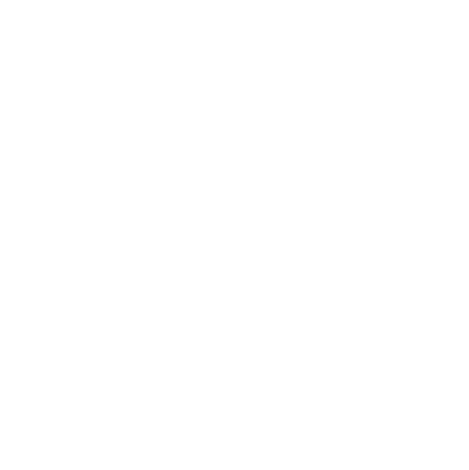

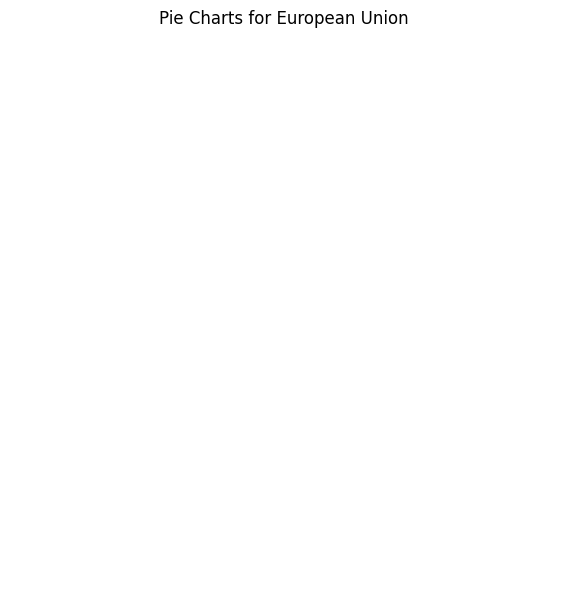

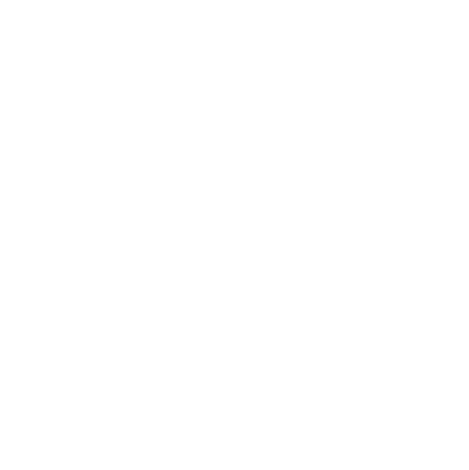

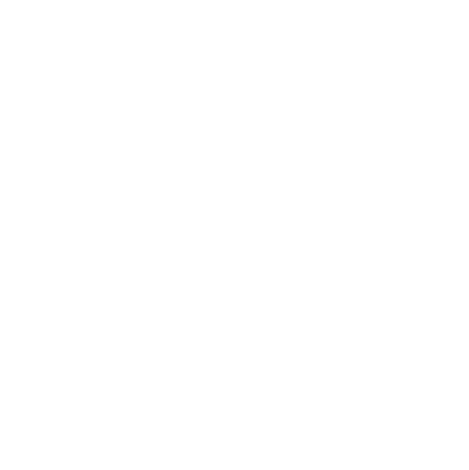

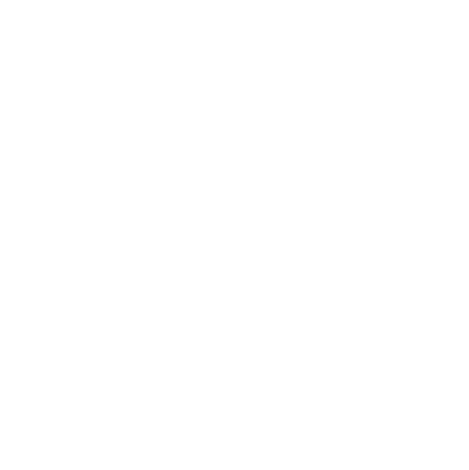

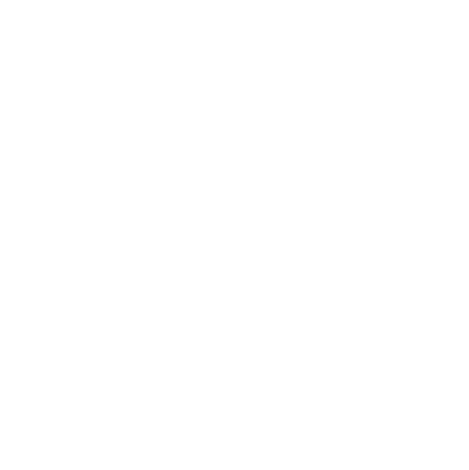

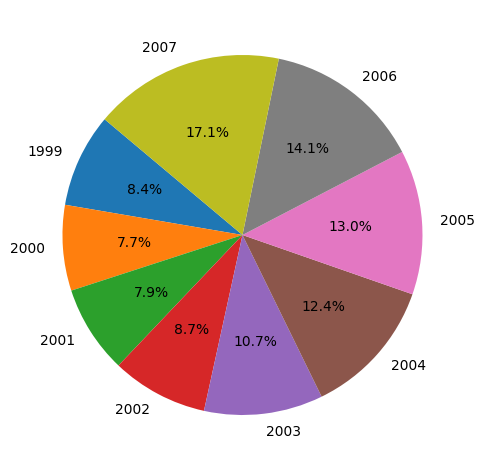

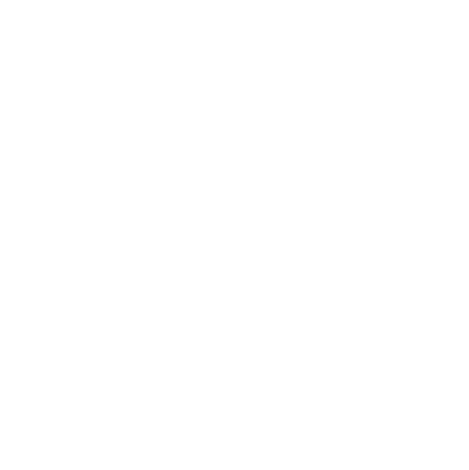

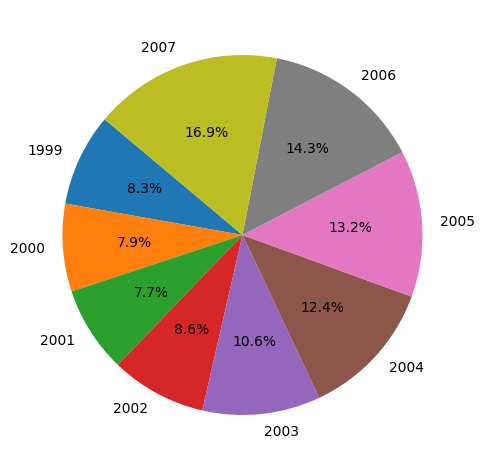

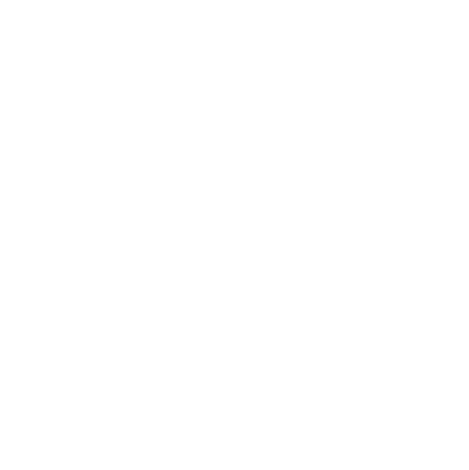

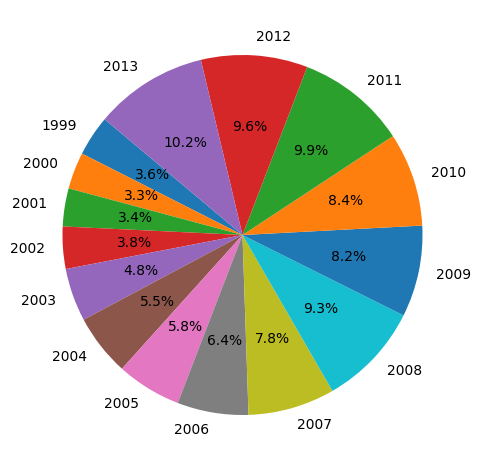

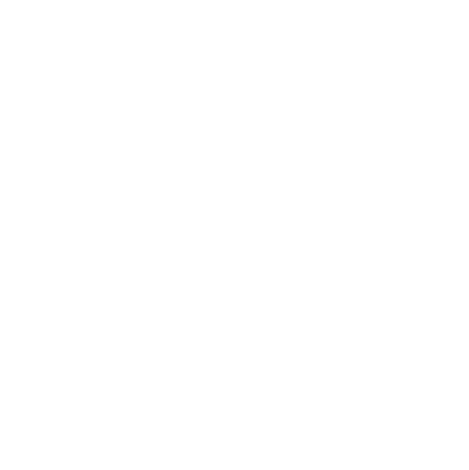

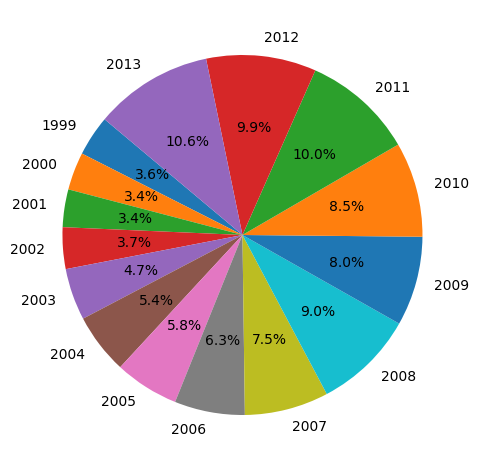

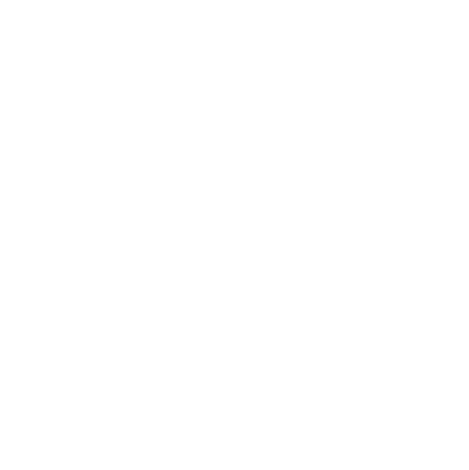

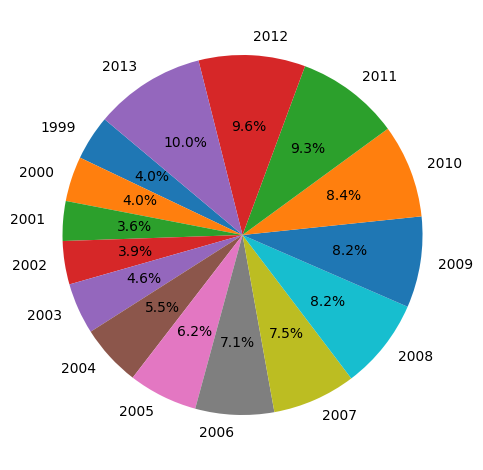

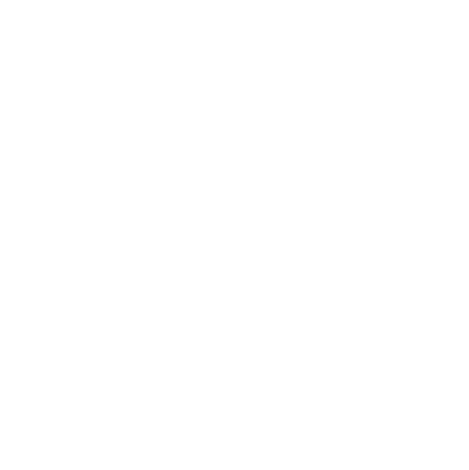

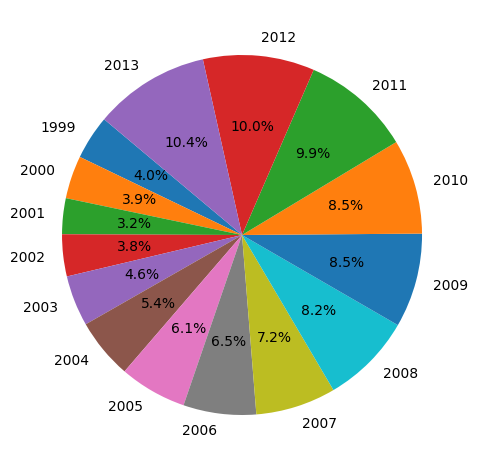

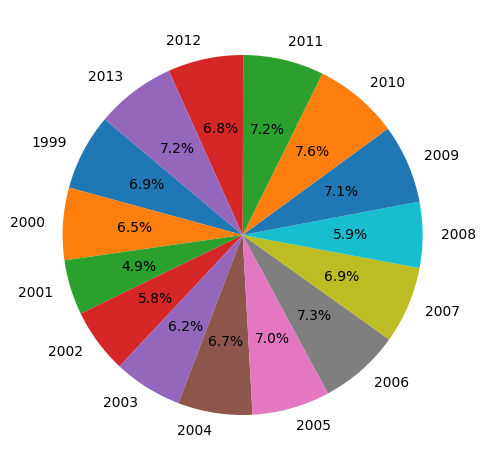

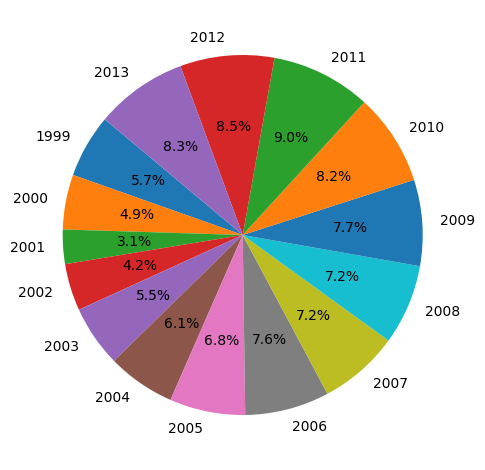

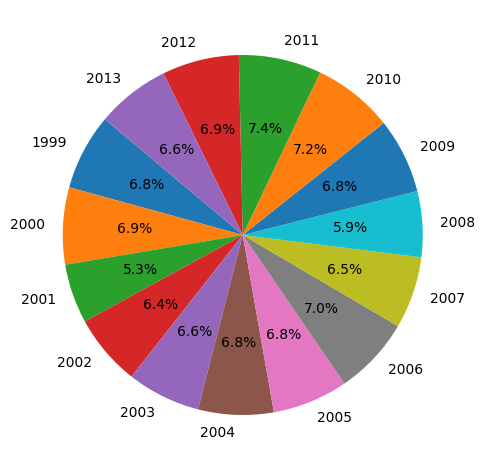

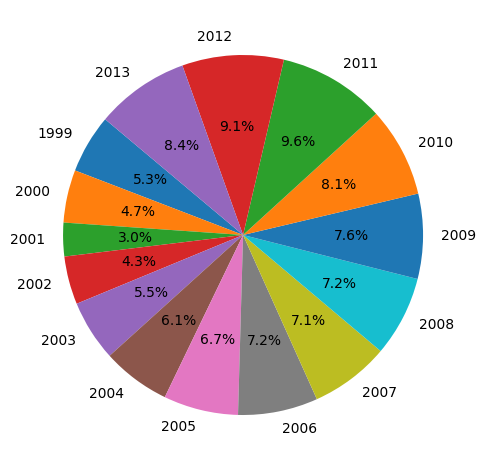

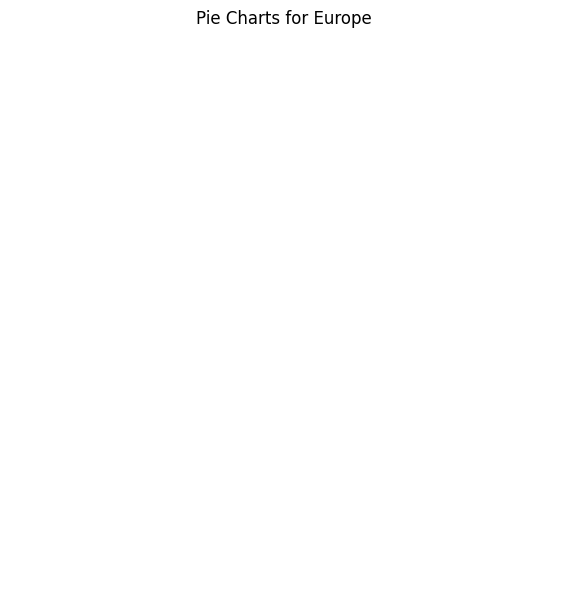

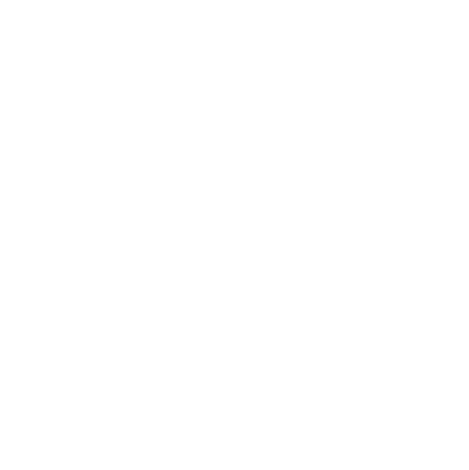

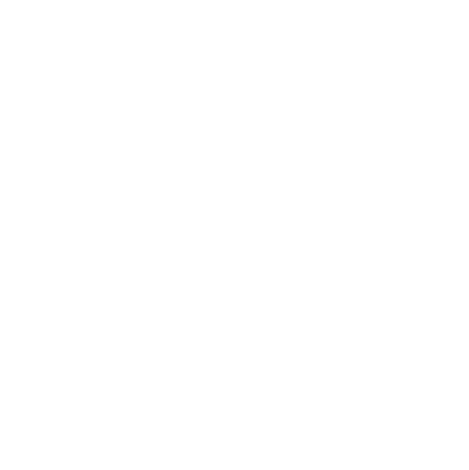

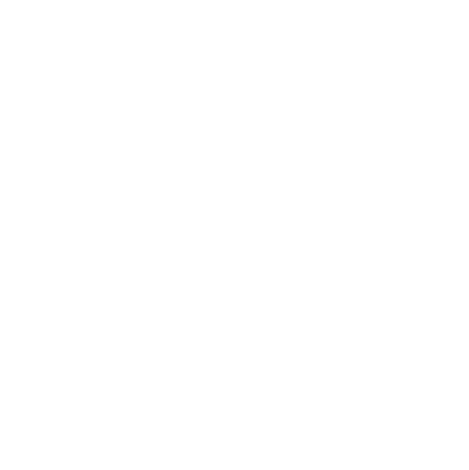

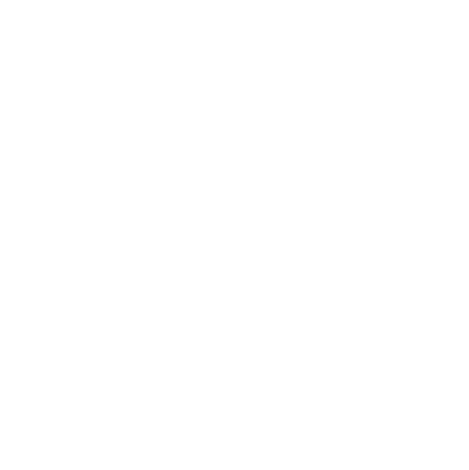

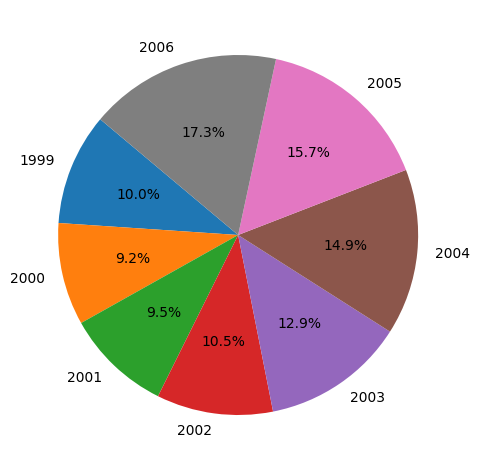

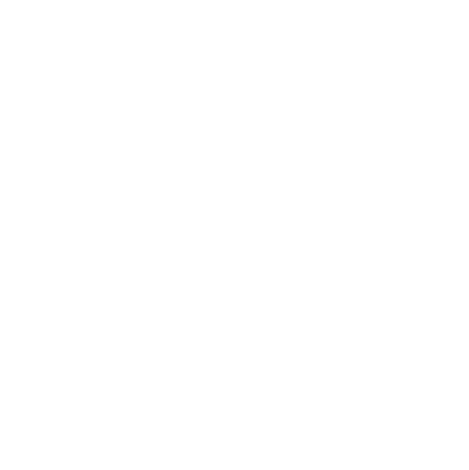

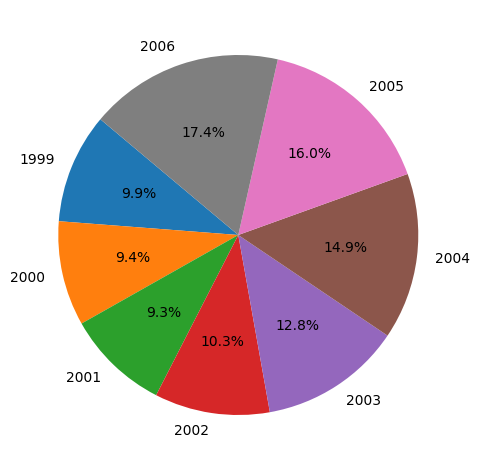

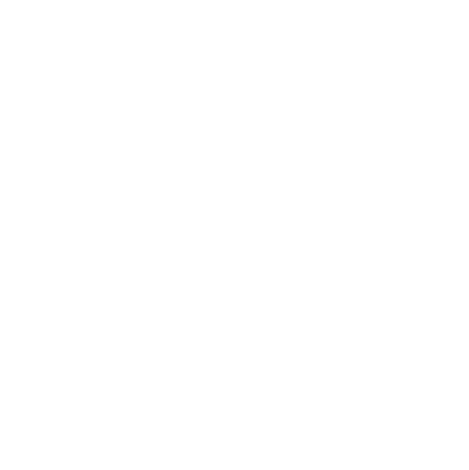

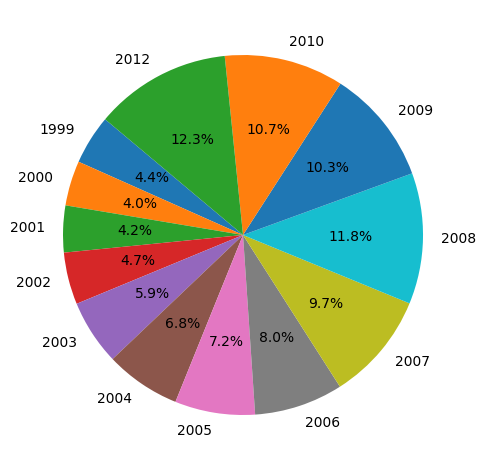

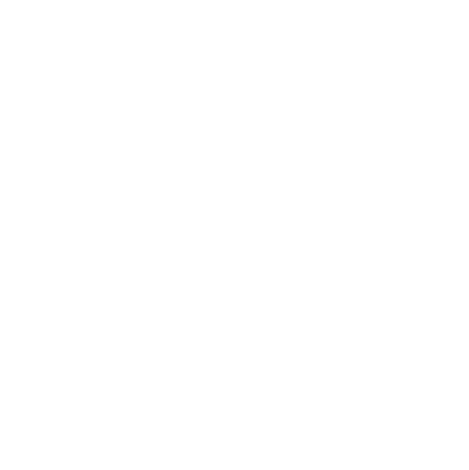

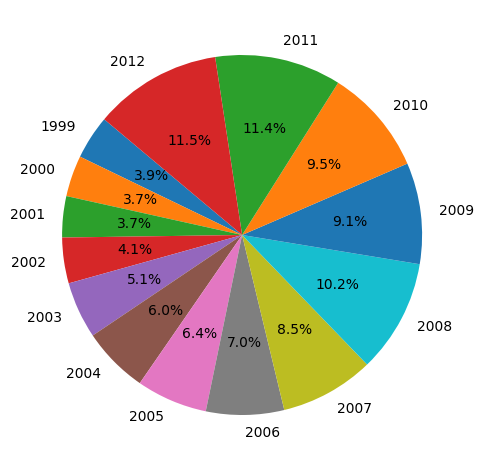

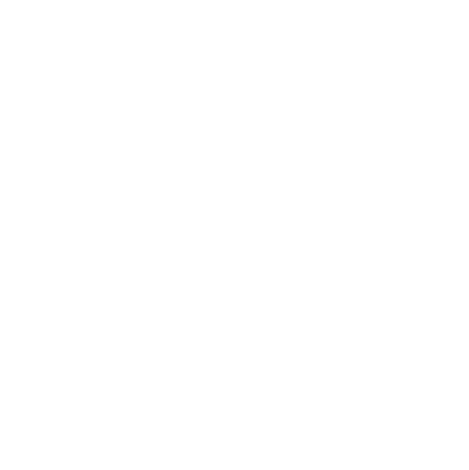

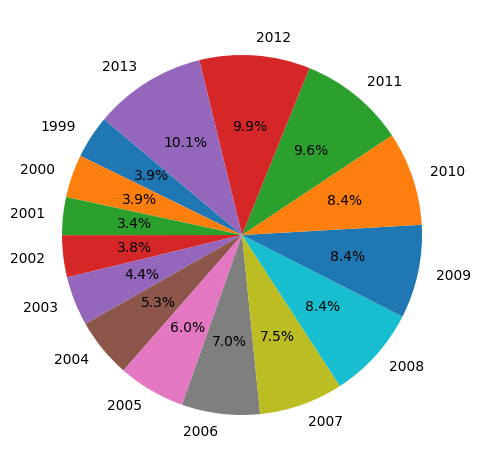

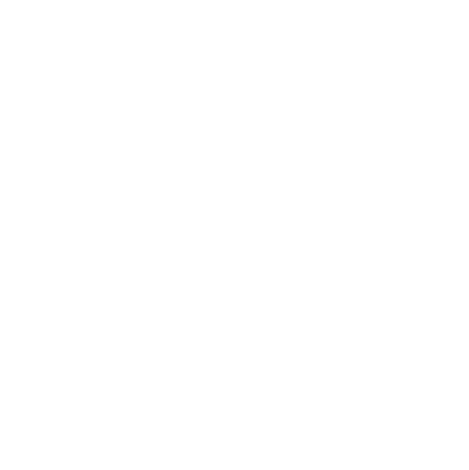

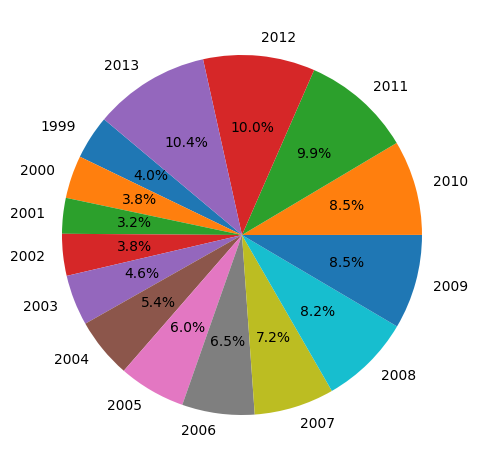

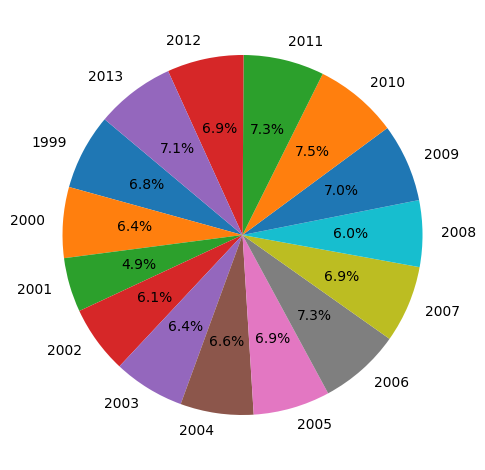

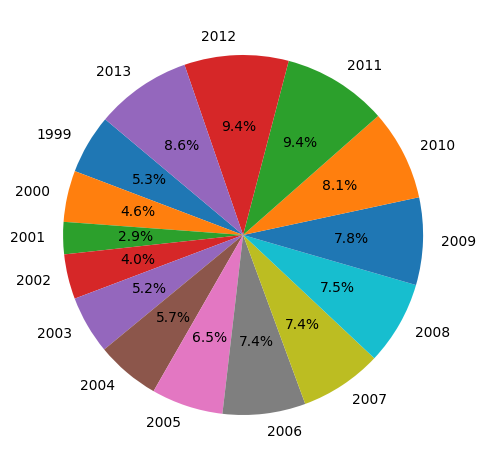

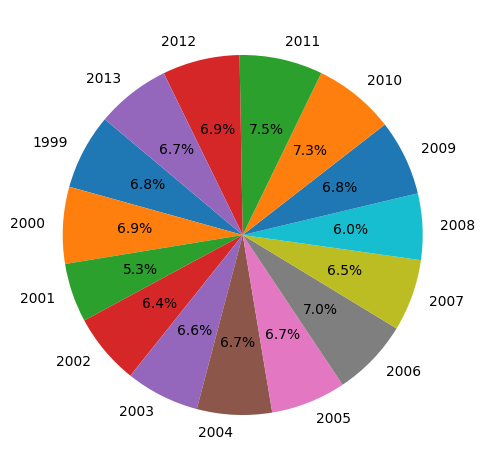

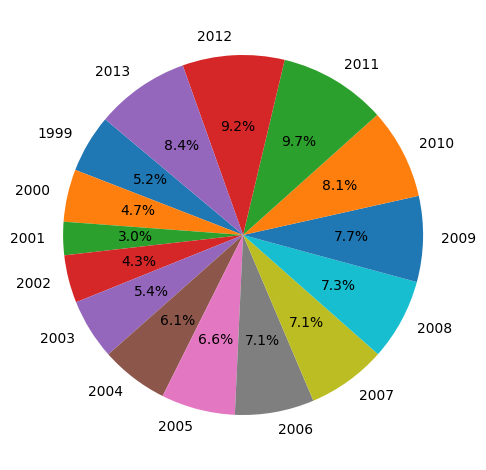

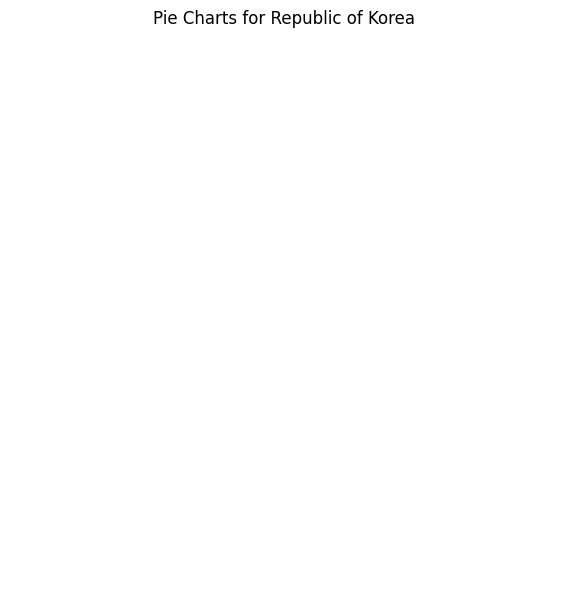

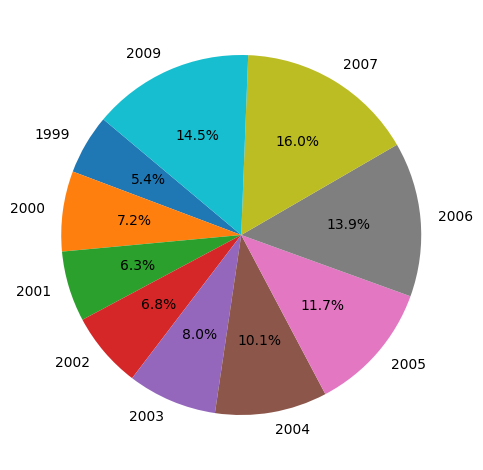

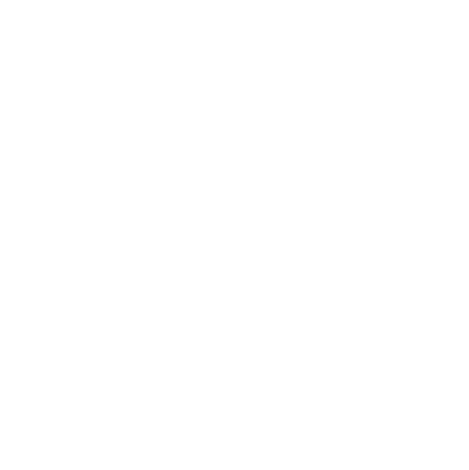

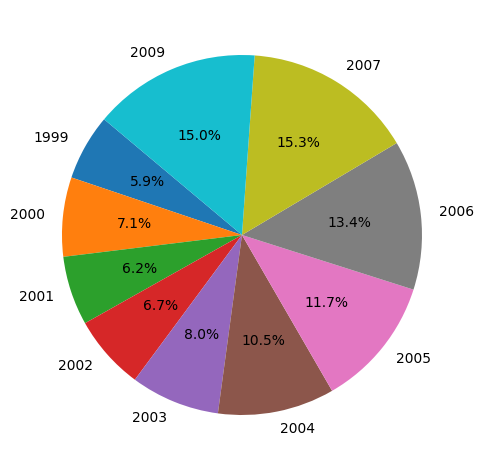

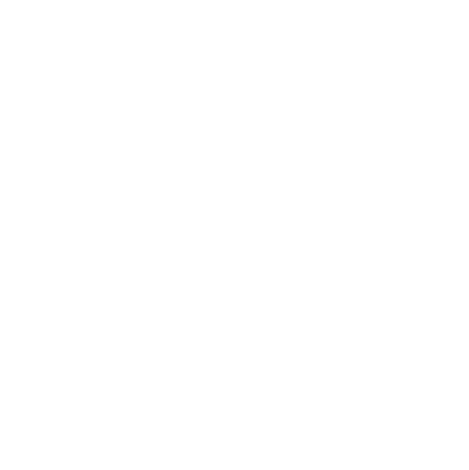

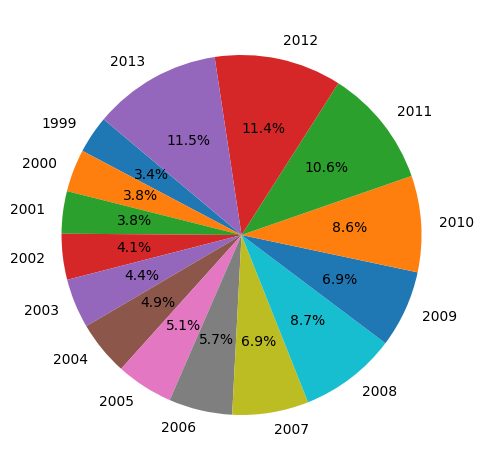

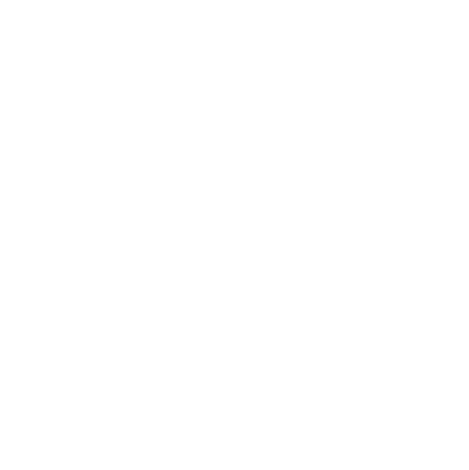

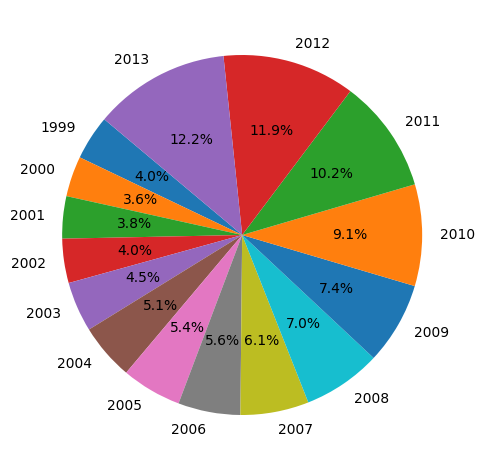

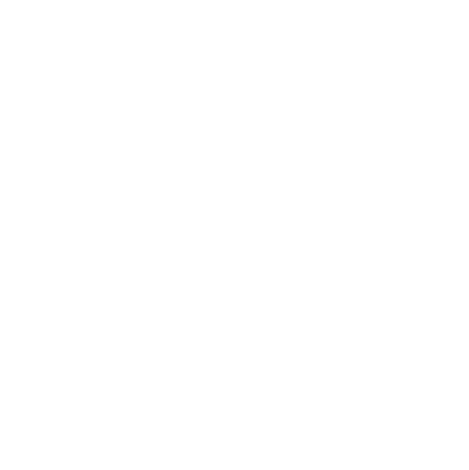

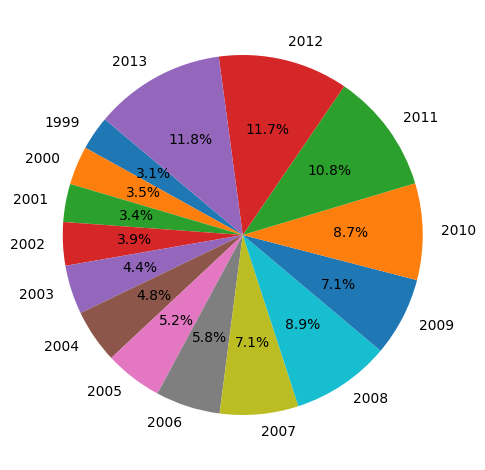

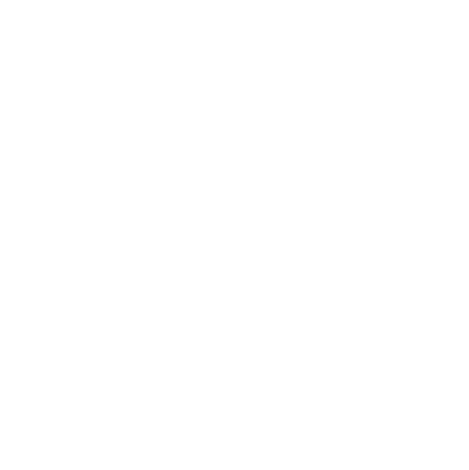

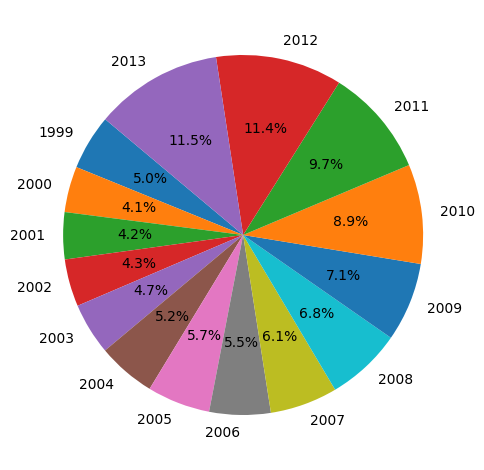

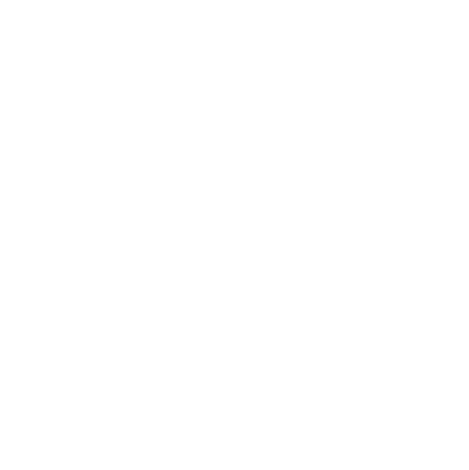

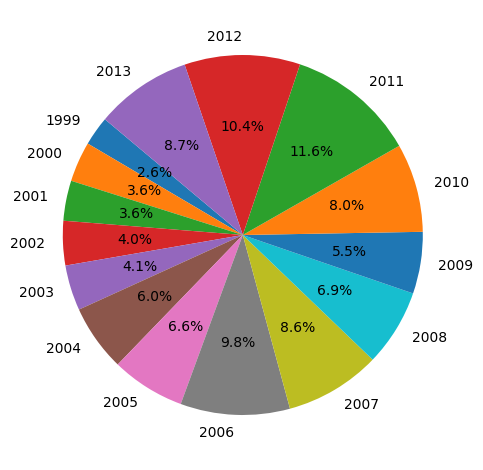

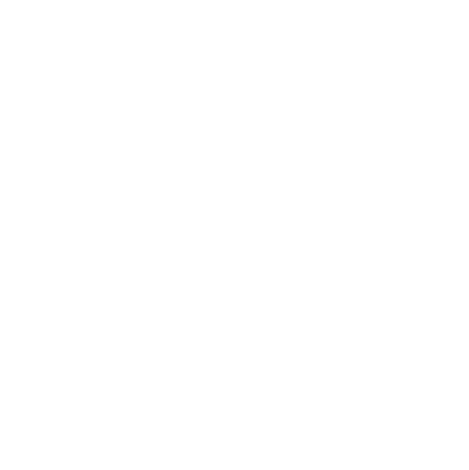

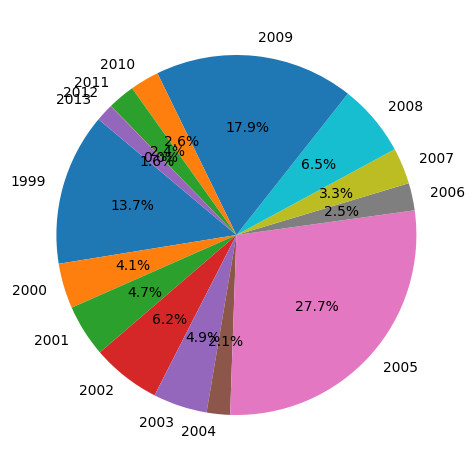

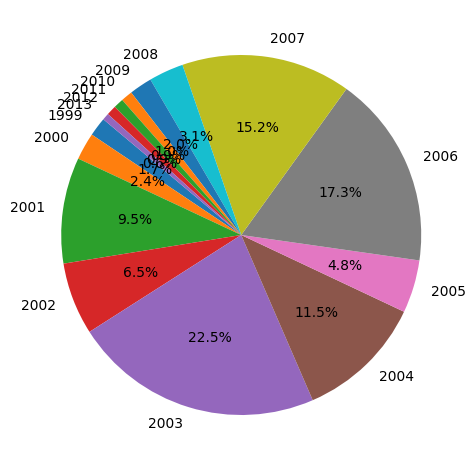

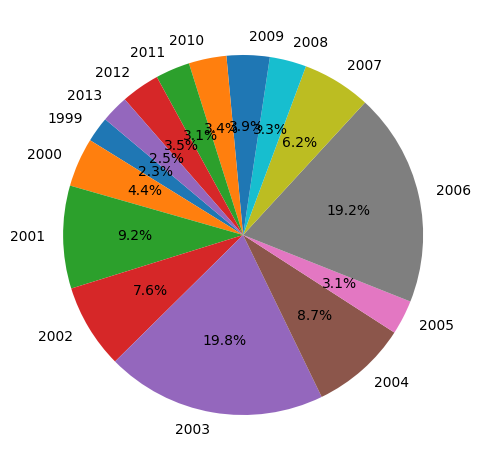

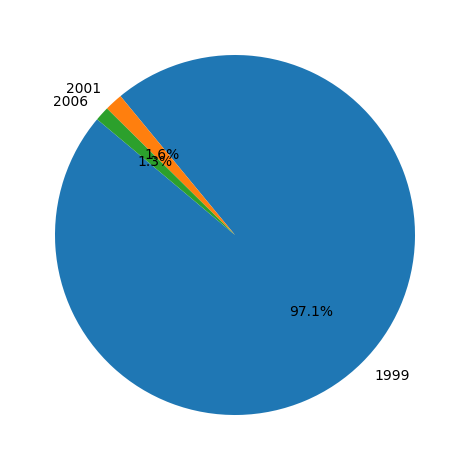

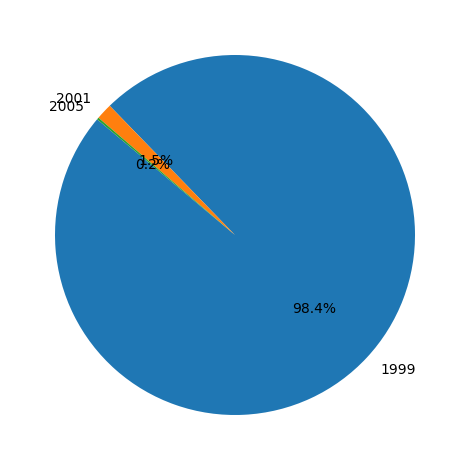

In [ ]:
# Sort the DataFrame by 'Item' instead of 'Element'
sorted_df = df4.sort_values(by='Item')

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(sorted_df['Item'].unique())

# Filter the DataFrame for the last 15 years
last_15_years = sorted_df[sorted_df['Year'] >= sorted_df['Year'].max() - 14]

# Get the top 5 items based on the mean 'Value' over the last 15 years
top_items = last_15_years.groupby('Item')['Value'].mean().sort_values(ascending=False).head(5).index

# Get the top 5 countries based on the mean 'Value' over the last 15 years
top_countries = last_15_years.groupby('Country')['Value'].mean().sort_values(ascending=False).head(5).index

# Create a separate set of pie charts for each country
for country in top_countries:
    plt.figure(figsize=(6, 6))
    plt.title(f'Pie Charts for {country}')

    for item in top_items:
        for element in ['Import Quantity', 'Import Value', 'Export Quantity', 'Export Value']:
            subset = last_15_years[(last_15_years['Country'] == country) & (last_15_years['Item'] == item) & (last_15_years['Element'] == element)]
            values = subset.groupby('Year')['Value'].sum()

            plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
            plt.tight_layout()
            plt.gca().set_aspect('equal')
            plt.show()


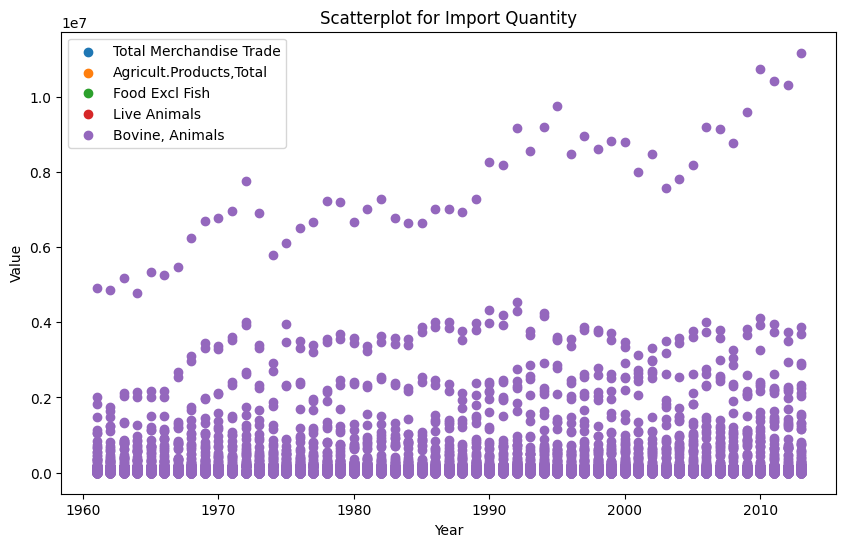

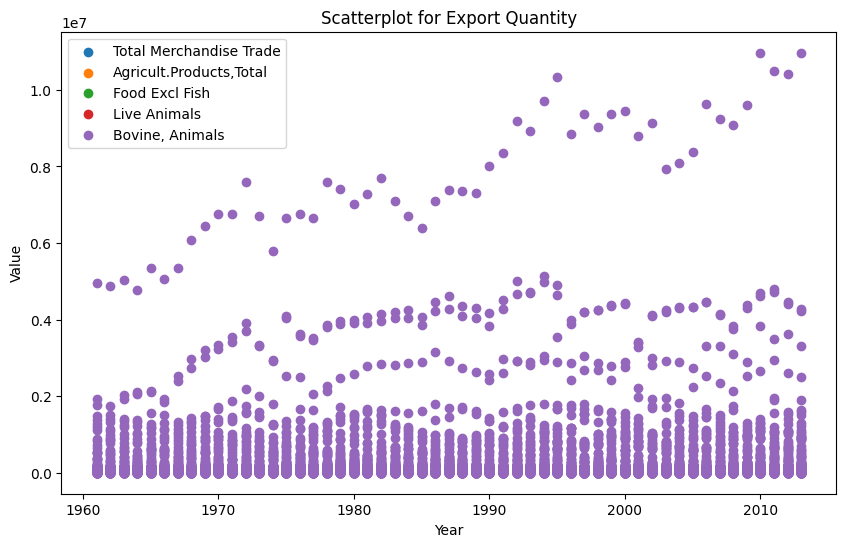

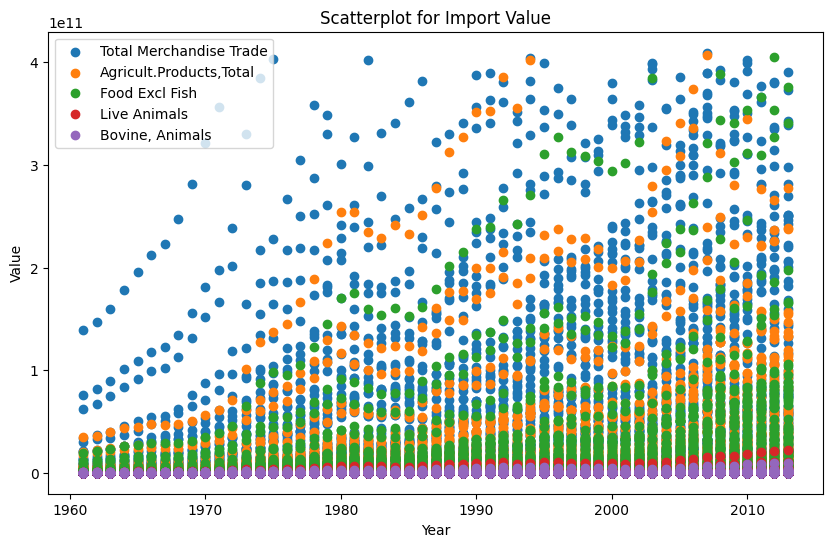

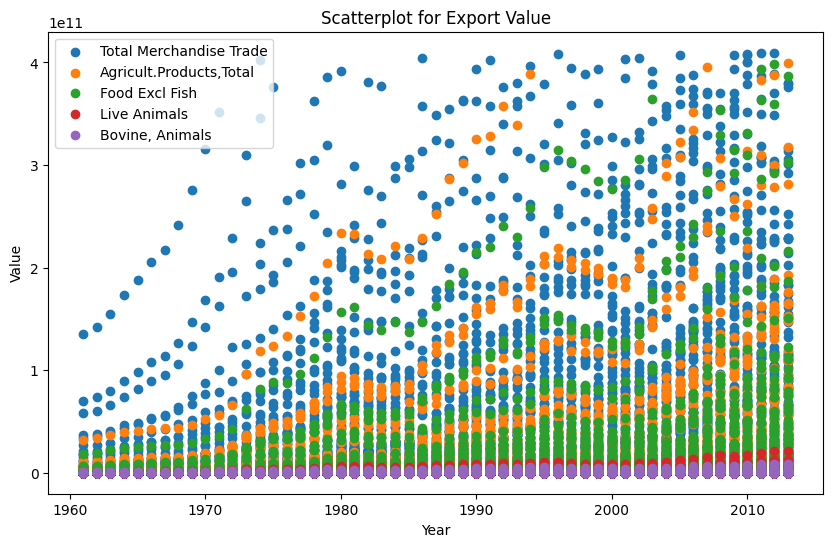

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Get the top 5 items based on the mean 'Value' over the last 15 years
top_items = sorted_df.groupby('Item')['Value'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 items and the 'Element' values of interest
filtered_df = sorted_df[(sorted_df['Item'].isin(top_items)) & (sorted_df['Element'].isin(['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']))]

# Create separate scatterplots for each 'Element' value
for element in ['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']:
    plt.figure(figsize=(10, 6))
    plt.title(f'Scatterplot for {element}')

    # Filter the data for the current 'Element'
    element_df = filtered_df[filtered_df['Element'] == element]

    # Iterate over the top 5 items and create a scatterplot for each
    for item in top_items:
        item_data = element_df[element_df['Item'] == item]

        # Plot the scatterplot
        plt.scatter(item_data['Year'], item_data['Value'], label=item)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Show the scatterplot
    plt.show()


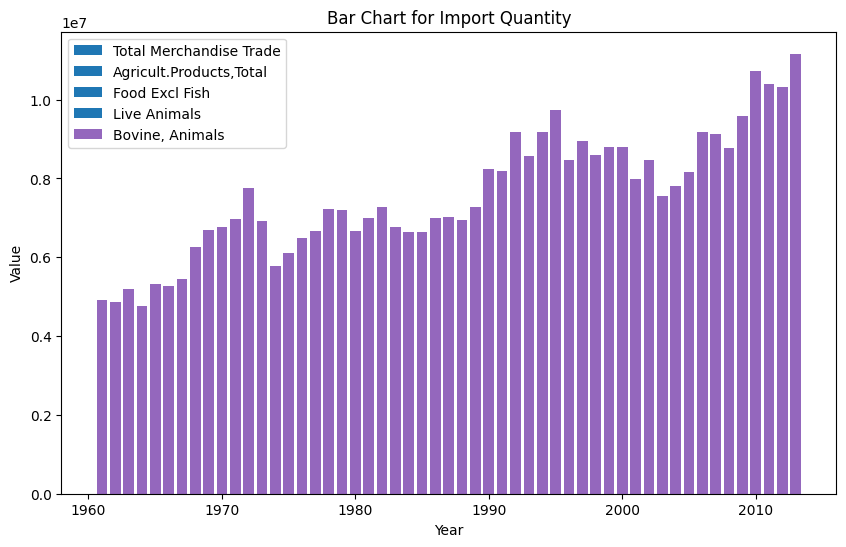

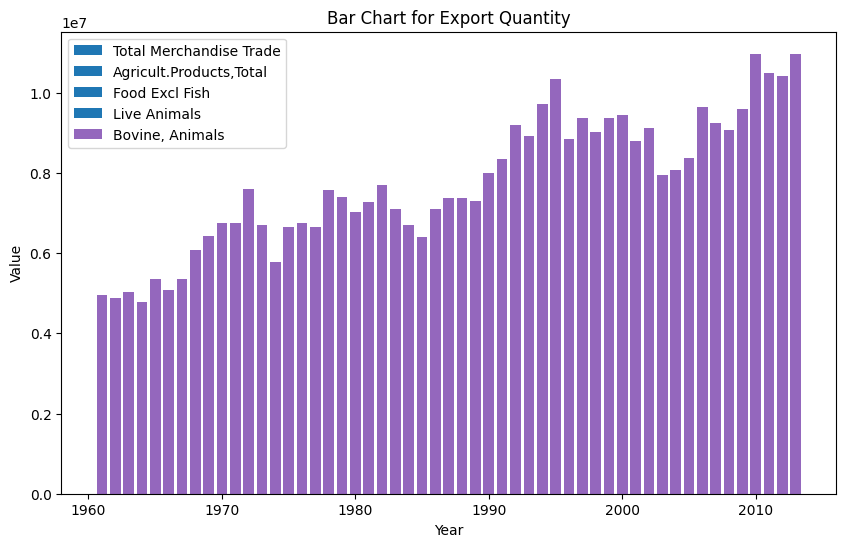

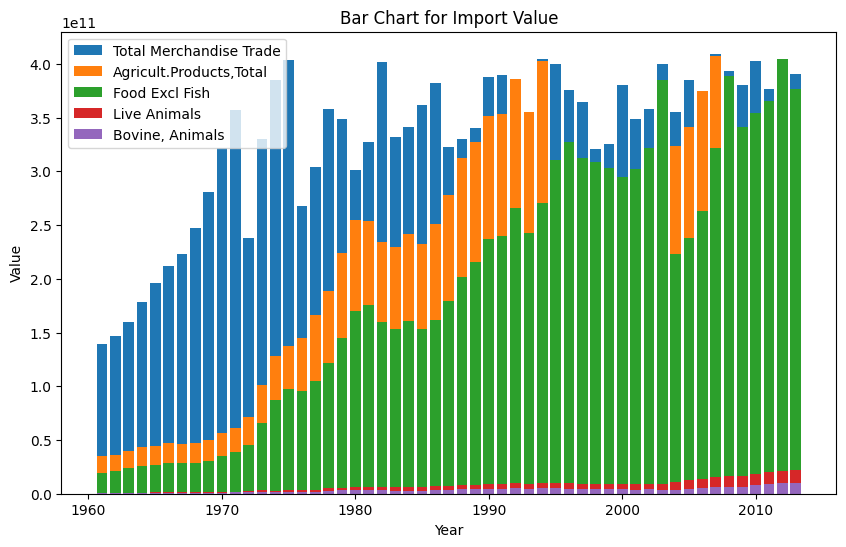

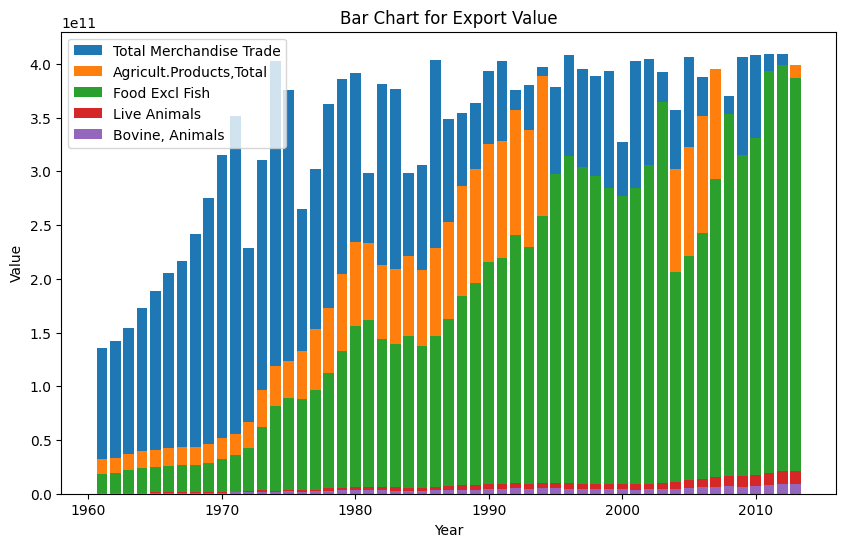

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by 'Item'
sorted_df = df4.sort_values(by='Item')

# Get the top 5 items based on the mean 'Value' over the last 15 years
top_items = sorted_df.groupby('Item')['Value'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 items and the 'Element' values of interest
filtered_df = sorted_df[(sorted_df['Item'].isin(top_items)) & (sorted_df['Element'].isin(['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']))]

# Create separate bar charts for each 'Element' value
for element in ['Import Quantity', 'Export Quantity', 'Import Value', 'Export Value']:
    plt.figure(figsize=(10, 6))
    plt.title(f'Bar Chart for {element}')

    # Filter the data for the current 'Element'
    element_df = filtered_df[filtered_df['Element'] == element]

    # Create a bar chart for each item
    for item in top_items:
        item_data = element_df[element_df['Item'] == item]

        # Plot the bar chart
        plt.bar(item_data['Year'], item_data['Value'], label=item)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Show the bar chart
    plt.show()


In [58]:
df4.head()

Country                     Item       Element  Year   Value
285321        Maldives  Agricult.Products,Total  Export Value  2009  1000.0
285302        Maldives  Agricult.Products,Total  Export Value  1990  2000.0
285318        Maldives  Agricult.Products,Total  Export Value  2006  2000.0
8159    American Samoa  Agricult.Products,Total  Export Value  2011  3000.0
8158    American Samoa  Agricult.Products,Total  Export Value  2010  3000.0

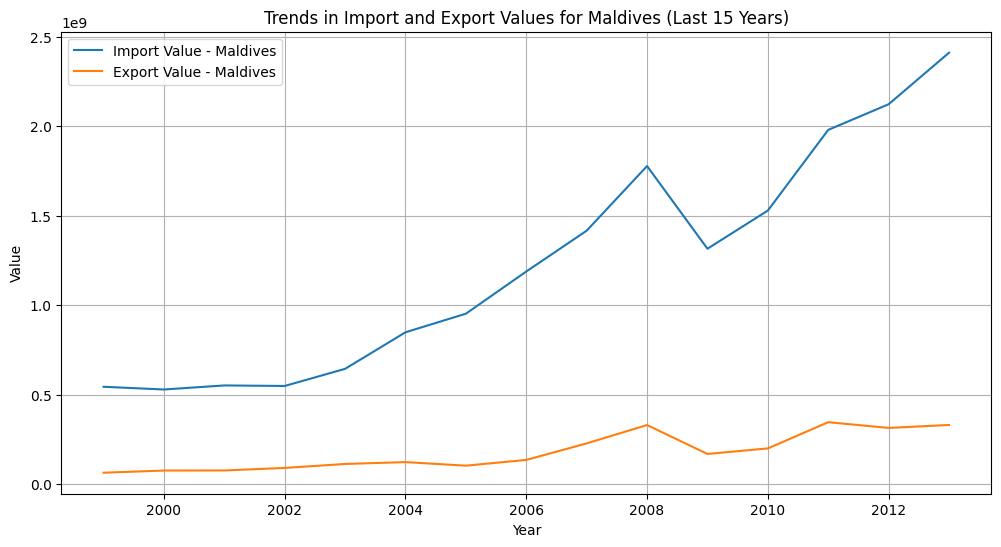

In [64]:
# Viz Q5

import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Maldives'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Value'], label=f'Import Value - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Value'], label=f'Export Value - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Values for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Vis Q5 extension for 5 top counties

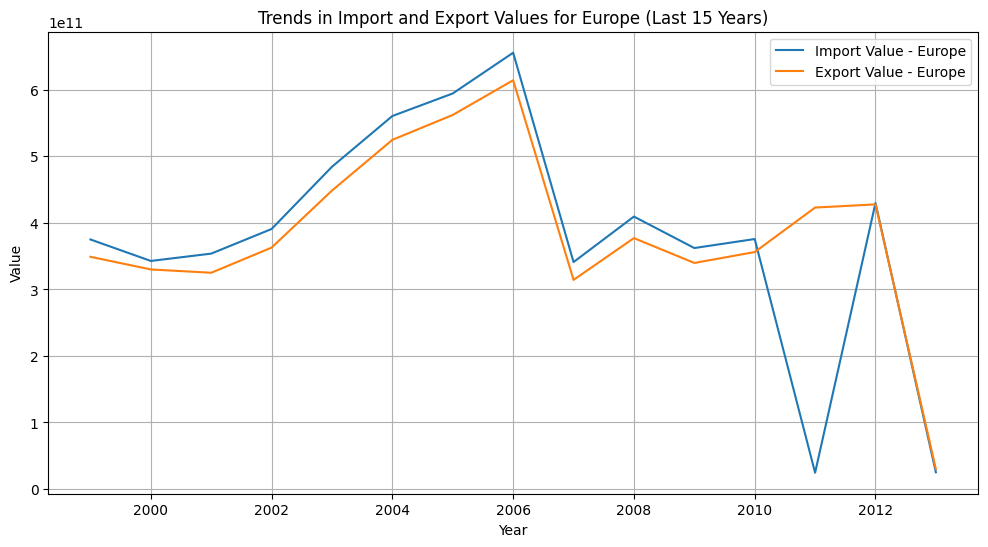

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Europe'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Value'], label=f'Import Value - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Value'], label=f'Export Value - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Values for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()


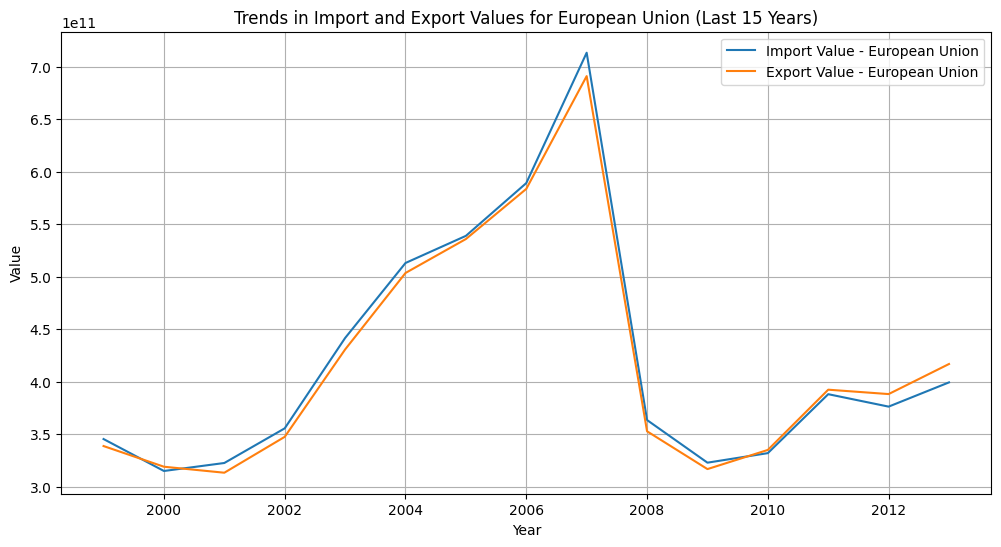

In [74]:
# Vis Q5 extension2 for 5 top counties
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'European Union'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Value'], label=f'Import Value - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Value'], label=f'Export Value - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Values for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()


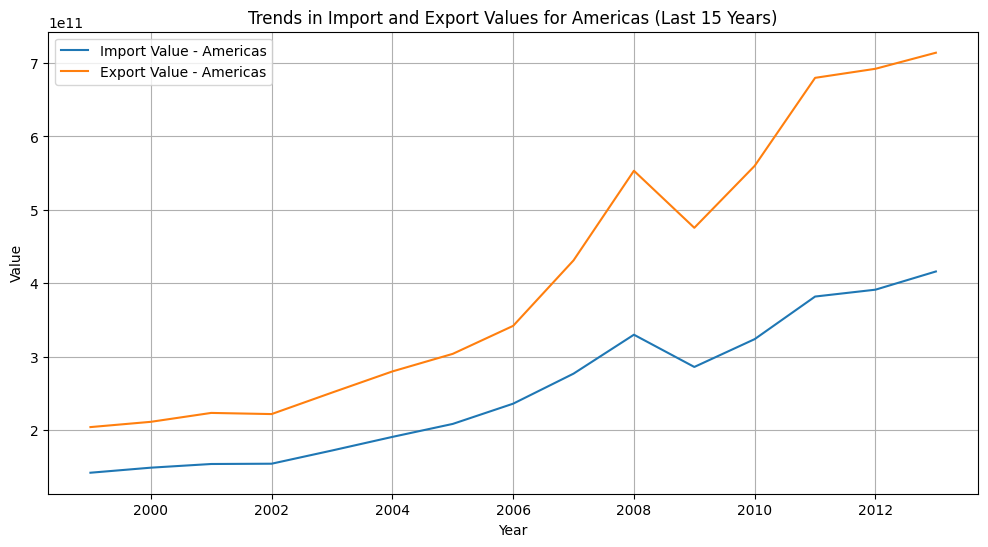

In [76]:
# Vis Q5 extension3 for 5 top counties
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Americas'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Value'], label=f'Import Value - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Value'], label=f'Export Value - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Values for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()

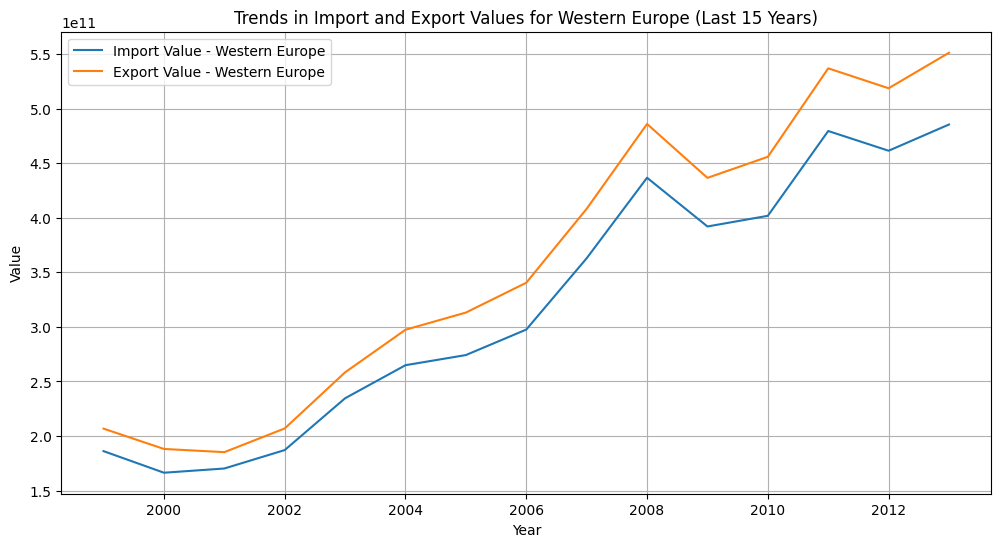

In [78]:
# Vis Q5 extension4 for 5 top counties
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Western Europe'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Value'], label=f'Import Value - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Value'], label=f'Export Value - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Values for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()

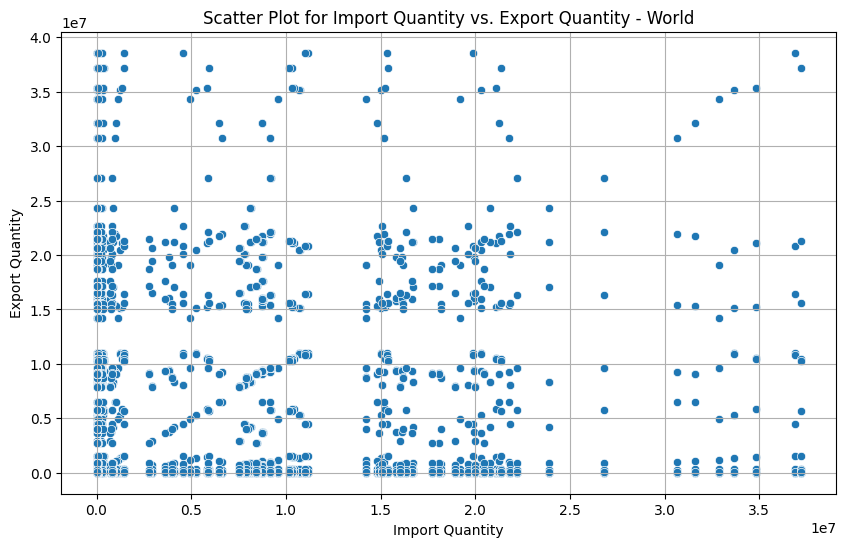

Correlation Coefficient for World: 0.01


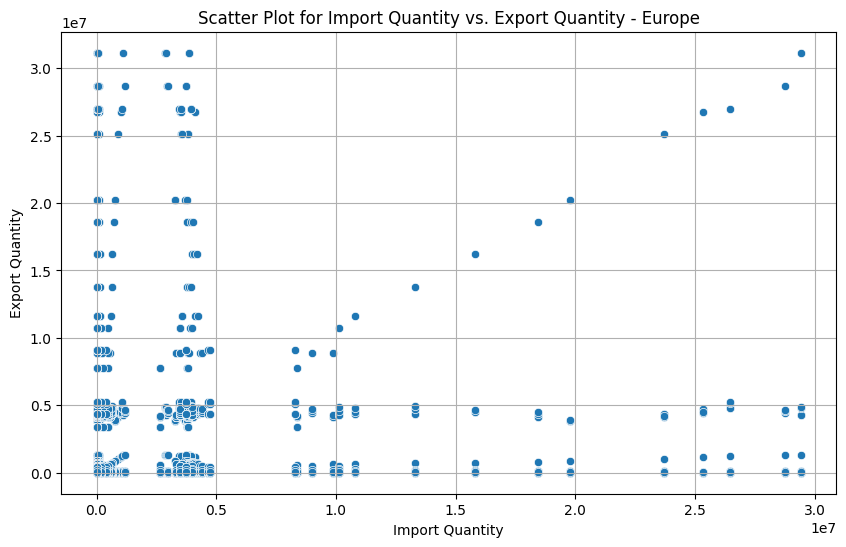

Correlation Coefficient for Europe: 0.01


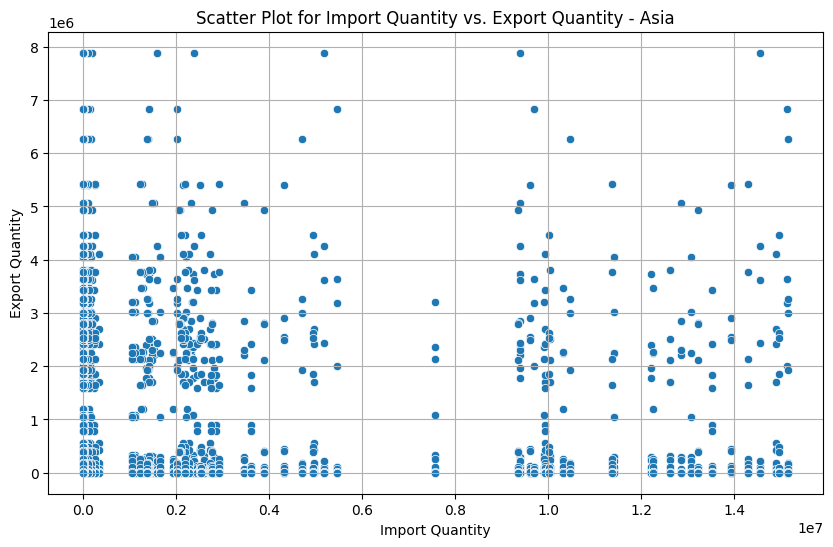

Correlation Coefficient for Asia: 0.01


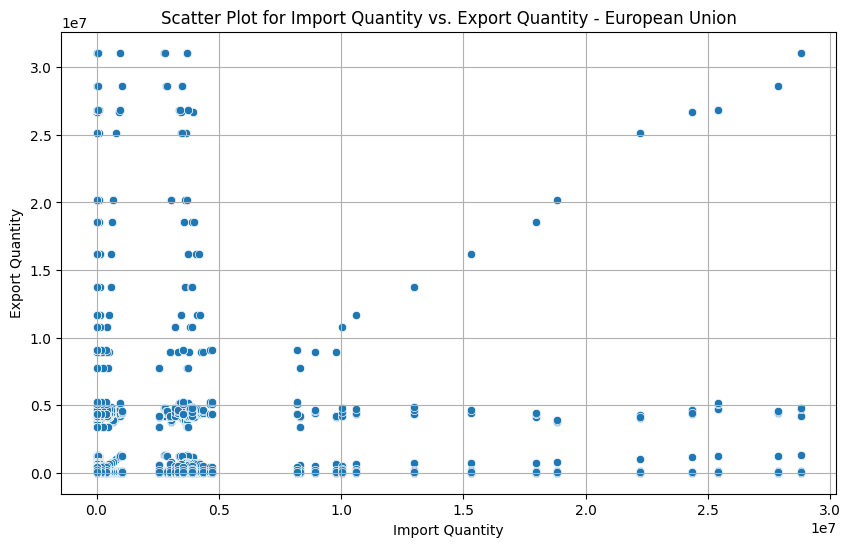

Correlation Coefficient for European Union: 0.01


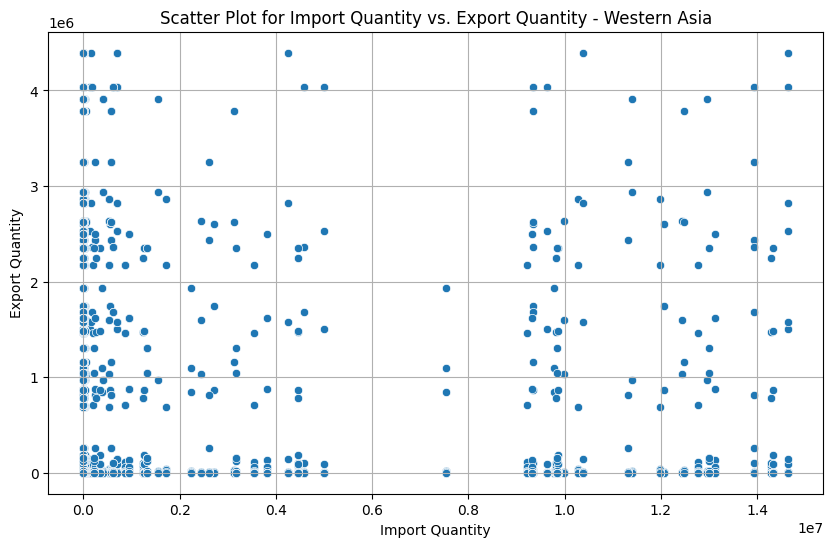

Correlation Coefficient for Western Asia: 0.00


In [83]:
#Q6 modified correlation between import quntity and export quantity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Identify the top 5 countries based on total import values
top_countries_import = df_last_15_years[df_last_15_years['Element'] == 'Import Quantity'].groupby('Country')['Value'].sum().nlargest(5).index

# Create individual scatter plots for each of the top 5 countries
for country in top_countries_import:
    country_data_import = df_last_15_years[(df_last_15_years['Country'] == country) & (df_last_15_years['Element'] == 'Import Quantity')]
    country_data_export = df_last_15_years[(df_last_15_years['Country'] == country) & (df_last_15_years['Element'] == 'Export Quantity')]

    # Merge the Import Quantity and Export Quantity data
    country_data = country_data_import.merge(country_data_export, on=['Year', 'Country'], suffixes=('_Import', '_Export'))

    # Create a scatter plot for Import Quantity vs. Export Quantity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=country_data, x='Value_Import', y='Value_Export')
    plt.xlabel('Import Quantity')
    plt.ylabel('Export Quantity')
    plt.title(f'Scatter Plot for Import Quantity vs. Export Quantity - {country}')
    plt.grid(True)
    plt.show()

    # Calculate and display the correlation coefficient
    correlation_coefficient = country_data['Value_Import'].corr(country_data['Value_Export'])
    print(f'Correlation Coefficient for {country}: {correlation_coefficient:.2f}')


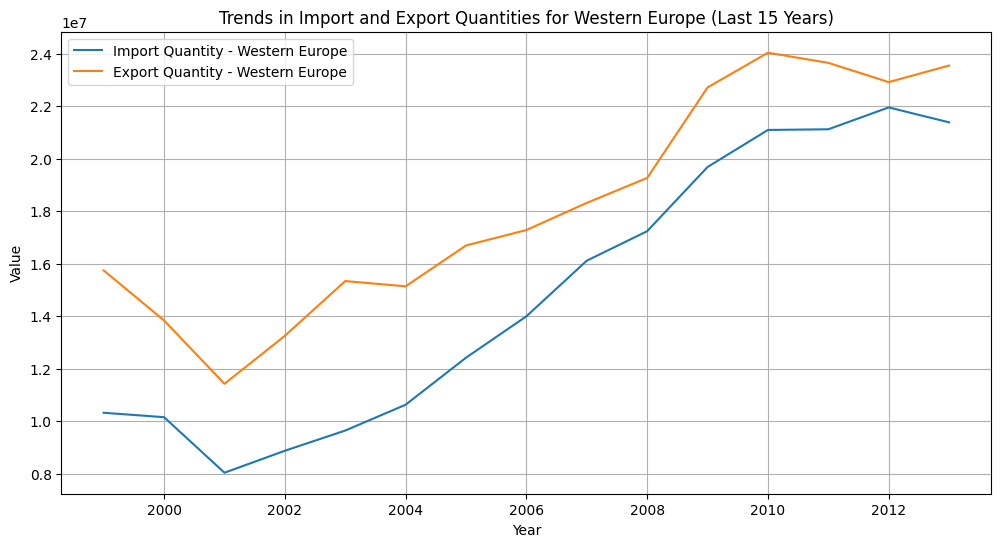

In [87]:
# Vis Q5 but for quantity parameters
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Western Europe'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Quantity'], label=f'Import Quantity - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Quantity'], label=f'Export Quantity - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Quantities for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()

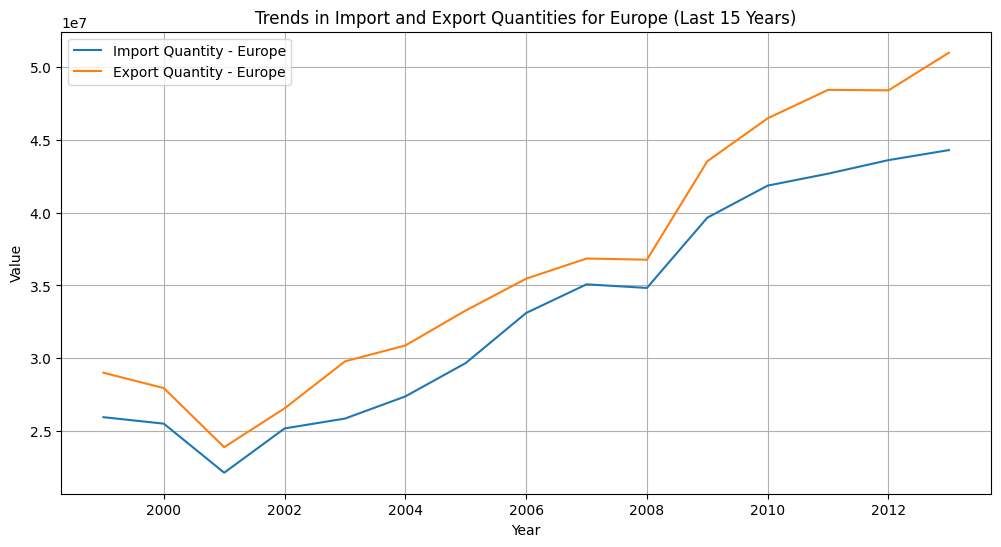

In [88]:
# Vis Q5 but for quantity parameters
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Europe'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Quantity'], label=f'Import Quantity - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Quantity'], label=f'Export Quantity - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Quantities for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()

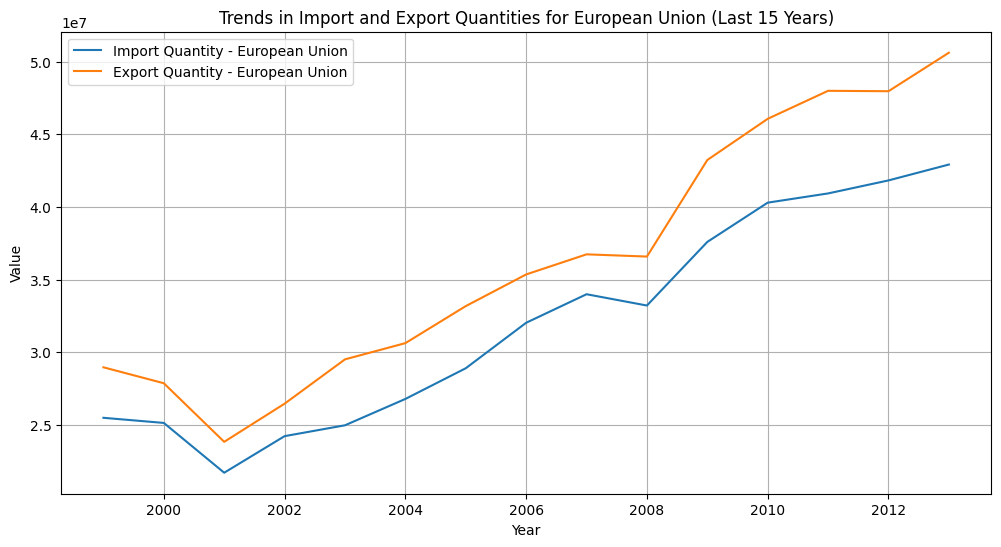

In [89]:
# Vis Q5 but for quantity parameters
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'European Union'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Quantity'], label=f'Import Quantity - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Quantity'], label=f'Export Quantity - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Quantities for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()

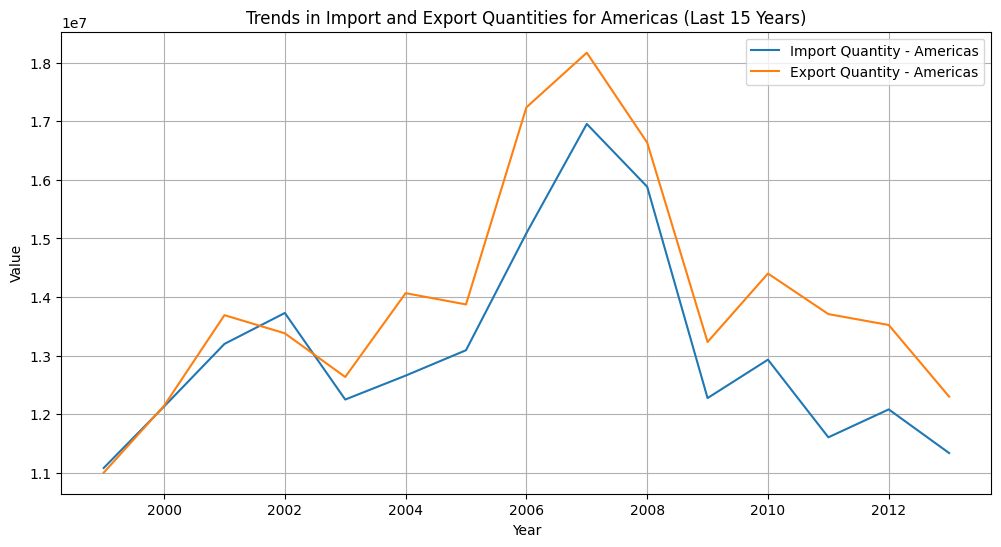

In [90]:
# Vis Q5 but for quantity parameters
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_data.csv' with the actual file path to your data
#df4 = pd.read_csv('your_data.csv')

# Filter data for the last 15 years
current_year = df4['Year'].max()
years_to_consider = range(current_year - 14, current_year + 1)
df_last_15_years = df4[df4['Year'].isin(years_to_consider)]

# Choose a country to analyze (replace 'CountryName' with the desired country)
country_to_analyze = 'Americas'  # Replace with the desired country name

# Filter data for the selected country
country_data = df_last_15_years[df_last_15_years['Country'] == country_to_analyze]

# Group data by year and element (Import/Export) and sum the values
grouped_data = country_data.groupby(['Year', 'Element'])['Value'].sum().unstack()

# Visualize the trends in import and export values for the selected country
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Import Quantity'], label=f'Import Quantity - {country_to_analyze}')
plt.plot(grouped_data.index, grouped_data['Export Quantity'], label=f'Export Quantity - {country_to_analyze}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Trends in Import and Export Quantities for {country_to_analyze} (Last 15 Years)')
plt.legend()
plt.grid(True)
plt.show()